# Project : Forecasting Company Insolvency

In this python notebook we will be implementing

1. Descriptive statistics
2. EDA (Data Visualization)
3. Feature engineering 
4. Dimension Reduction
5. Feature selection
6. Conclusion of Feature Engineering (Dimension Reduction & Feature Selection)
7. Recommended List of Features.
8. Modeling (Introduction to each model)
9. Model Implementation
10. Cross-validation and hyperparameter tuning for each model
11. Each model performance metrics
12. Summary of all models' performance 
13. Recommend the best model
14. Conclusion

In [1]:
!pip install xgboost

In [2]:
# Import all necessary libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")


import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import plotly.graph_objs as go
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from matplotlib.pyplot import figure
from xgboost import plot_tree, plot_importance
from sklearn.model_selection import train_test_split
import scikitplot as skplt # Package for ROC vurve
from sklearn.metrics import confusion_matrix, classification_report, f1_score,auc,roc_curve,roc_auc_score, precision_recall_curve

from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Load the Dataset
CBP_df = pd.read_csv(r"/Users/payalchavan/Documents/Data Mining_Assignments/data.csv")
CBP_df.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

## Descriptive Statistics

In [4]:
# Take a look at the data structure
CBP_df.shape

(6819, 96)

In [5]:
# Getting info about the dataset 
CBP_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [6]:
# Checking statistics of the dataset
CBP_df.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  ...  \
count                                   6819.000000  ...   
mean                                       0.303623  ...   
std                                        0.011163  ...   
min                                        0.000000  ...   
25%                                        0.303466  ...   
50%                                        0.303525  ...   
75%                                        0.303585  ...   
max                                        1.000000  ...   

        Net Income to Total Assets   Total assets to GNP price  \
count                  6819.000000                6.819000e+03   
mean                      0.807760                1.862942e+07   
std                       0.040332                3.764501e+08   
min

In [7]:
# Check for any missing values in the dataset

CBP_df.isnull().sum()  

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

There are no missing values present in our dataset, and hence the data is clean. 

In [8]:
# Check for duplicate records

CBP_df.duplicated().sum()

0

There were no duplicate records found in our dataset.

Remove extra spaces at the beginning and end of the column name. Also, replace spaces with underscores to make it easier to read.

In [9]:
# Removing extra spaces and replacing with '_'

CBP_df.columns = [c.strip().replace(' ', '_') for c in CBP_df.columns]
CBP_df.head()

Bankrupt?  ROA(C)_before_interest_and_depreciation_before_interest  \
0          1                                           0.370594         
1          1                                           0.464291         
2          1                                           0.426071         
3          1                                           0.399844         
4          1                                           0.465022         

   ROA(A)_before_interest_and_%_after_tax  \
0                                0.424389   
1                                0.538214   
2                                0.499019   
3                                0.451265   
4                                0.538432   

   ROA(B)_before_interest_and_depreciation_after_tax  Operating_Gross_Margin  \
0                                           0.405750                0.601457   
1                                           0.516730                0.610235   
2                                           0.472295                0.601450   
3                                           0.457733                0.583541   
4                                           0.522298                0.598783   

   Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
0                     0.601457               0.998969   
1                     0.610235               0.998946   
2                     0.601364               0.998857   
3                     0.583541               0.998700   
4                     0.598783               0.998973   

   Pre-tax_net_Interest_Rate  After-tax_net_Interest_Rate  \
0                   0.796887                     0.808809   
1                   0.797380                     0.809301   
2                   0.796403                     0.808388   
3                   0.796967                     0.808966   
4                   0.797366                     0.809304   

   Non-industry_income_and_expenditure/revenue  ...  \
0                                     0.302646  ...   
1                                     0.303556  ...   
2                                     0.302035  ...   
3                                     0.303350  ...   
4                                     0.303475  ...   

   Net_Income_to_Total_Assets  Total_assets_to_GNP_price  No-credit_Interval  \
0                    0.716845                   0.009219            0.622879   
1                    0.795297                   0.008323            0.623652   
2                    0.774670                   0.040003            0.623841   
3                    0.739555                   0.003252            0.622929   
4                    0.795016                   0.003878            0.623521   

   Gross_Profit_to_Sales  Net_Income_to_Stockholder's_Equity  \
0               0.601453                            0.827890   
1               0.610237                            0.839969   
2               0.601449                            0.836774   
3               0.583538                            0.834697   
4               0.598782                            0.839973   

   Liability_to_Equity  Degree_of_Financial_Leverage_(DFL)  \
0             0.290202                            0.026601   
1             0.283846                            0.264577   
2             0.290189                            0.026555   
3             0.281721                            0.026697   
4             0.278514                            0.024752   

   Interest_Coverage_Ratio_(Interest_expense_to_EBIT)  Net_Income_Flag  \
0                                           0.564050                 1   
1                                           0.570175                 1   
2                                           0.563706                 1   
3                                           0.564663                 1   
4                                           0.575617                 1   

   Equity_to_Liability  
0             0.016469  
1             0.020794  
2           

In [10]:
# Checking unique values in dataset

CBP_df.nunique()

Bankrupt?                                                     2
ROA(C)_before_interest_and_depreciation_before_interest    3333
ROA(A)_before_interest_and_%_after_tax                     3151
ROA(B)_before_interest_and_depreciation_after_tax          3160
Operating_Gross_Margin                                     3781
                                                           ... 
Liability_to_Equity                                        6819
Degree_of_Financial_Leverage_(DFL)                         6240
Interest_Coverage_Ratio_(Interest_expense_to_EBIT)         6240
Net_Income_Flag                                               1
Equity_to_Liability                                        6819
Length: 96, dtype: int64

In [11]:
CBP_df['Net_Income_Flag'].value_counts()

Net_Income_Flag
1    6819
Name: count, dtype: int64

It appears that the 'Net_Income_Flag' variable contains only one value, indicating no variability in the target variable. So removing that variable from analysis

In [12]:
CBP_df = CBP_df.drop('Net_Income_Flag', axis=1)

In [13]:
CBP_df.duplicated().sum()

0

### Exploratory Data Analysis

Determining the number of bankrupt and non-bankrupt companies separately in the dataset, where '1' represents bankruptcy and '0' represents non-bankruptcy.

Bankrupt?
0    6599
1     220
Name: count, dtype: int64


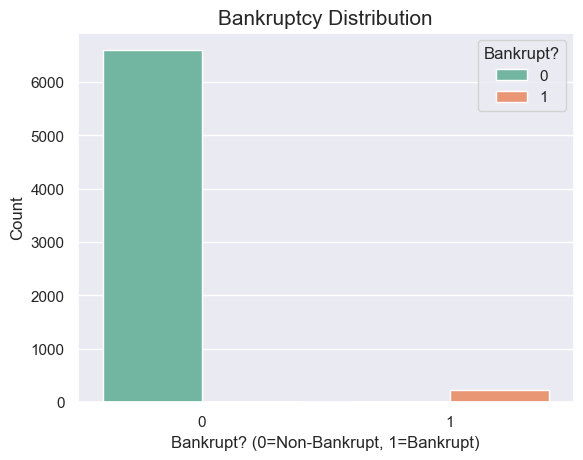

In [14]:
# Plot count plot for Bankruptcy Distribution

print(CBP_df['Bankrupt?'].value_counts())

sns.set_theme(style="darkgrid")
sns.countplot(x="Bankrupt?", data=CBP_df, palette="Set2", hue='Bankrupt?')
plt.xlabel('Bankrupt? (0=Non-Bankrupt, 1=Bankrupt)')
plt.ylabel('Count')
plt.title('Bankruptcy Distribution', fontsize=15)
plt.show()

In [15]:
# Plot a pie-chart to show the distribution of Bankruptcy

import plotly.graph_objects as go
labels = CBP_df['Bankrupt?'].unique()
values = CBP_df['Bankrupt?'].value_counts().sort_values(ascending = True)


# Create the pie chart
fig = go.Figure(data=[go.Pie(
    labels=labels,
    values=values,
    hole=0.5,
)])

# Set layout title
fig.update_layout(title='Bankrupt Distribution')

# Show the plot
fig.show()


The histogram and pie chart indicate an imbalance in the data. Only 3.23% of the companies are bankrupt. To address this imbalance, we will further examine the dataset and focus on handling the imbalanced data.

### Plotting Correlation plot to check relationship between variable 

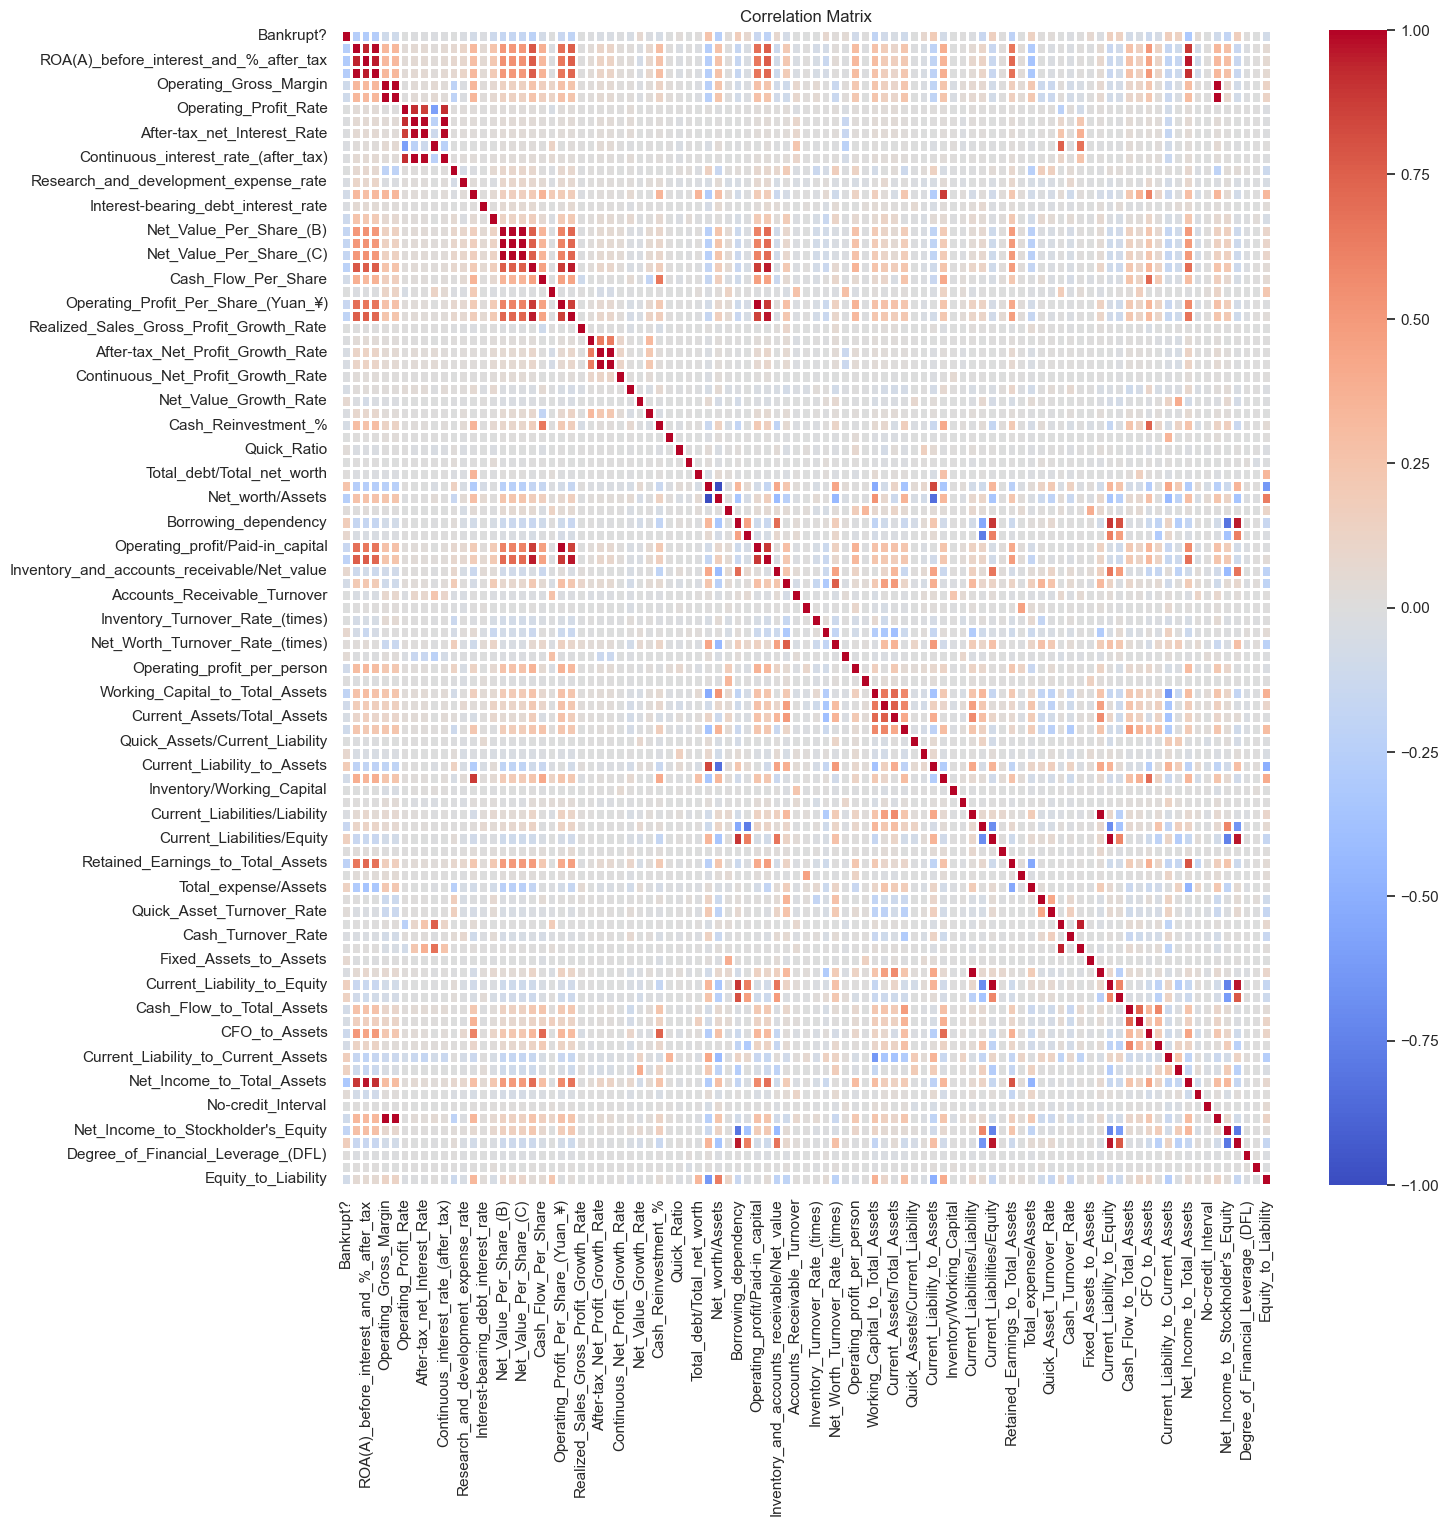

In [16]:
# Plot a correlation matrix to check correlation among numerical features

correlation = CBP_df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(CBP_df.corr(), cmap='coolwarm', linewidths=2.0)
plt.title('Correlation Matrix')
plt.show()

Going ahead, we will choose the features whose correlation with the target variable, Bankrupt? is higher than 0.01. This resulted in 72 features that were highly correlated to the target variable. Moving further, we again performed the similar task to check the features having correlation greater than 0.1 with the target variable. Finally, we acquired 33 features showing a high correlation with the outcome variable.



In [17]:
# Checking correlation between Target variable and other variables

correlation_with_target = correlation['Bankrupt?'].abs().sort_values(ascending=False)
correlation_with_target

Bankrupt?                                                  1.000000
Net_Income_to_Total_Assets                                 0.315457
ROA(A)_before_interest_and_%_after_tax                     0.282941
ROA(B)_before_interest_and_depreciation_after_tax          0.273051
ROA(C)_before_interest_and_depreciation_before_interest    0.260807
                                                             ...   
Inventory/Current_Liability                                0.000822
Long-term_Liability_to_Current_Assets                      0.000778
Cash_Flow_to_Sales                                         0.000479
Realized_Sales_Gross_Profit_Growth_Rate                    0.000458
Operating_Profit_Rate                                      0.000230
Name: Bankrupt?, Length: 95, dtype: float64

In [18]:
# taking features which have correlation > 0.01 based on target variable bankrupt

features_with_correlation = correlation_with_target[correlation_with_target.values > 0.01].index
len(features_with_correlation)

72

In [19]:
CBP_df[features_with_correlation].describe()

Bankrupt?  Net_Income_to_Total_Assets  \
count  6819.000000                 6819.000000   
mean      0.032263                    0.807760   
std       0.176710                    0.040332   
min       0.000000                    0.000000   
25%       0.000000                    0.796750   
50%       0.000000                    0.810619   
75%       0.000000                    0.826455   
max       1.000000                    1.000000   

       ROA(A)_before_interest_and_%_after_tax  \
count                             6819.000000   
mean                                 0.558625   
std                                  0.065620   
min                                  0.000000   
25%                                  0.535543   
50%                                  0.559802   
75%                                  0.589157   
max                                  1.000000   

       ROA(B)_before_interest_and_depreciation_after_tax  \
count                                        6819.000000   
mean                                            0.553589   
std                                             0.061595   
min                                             0.000000   
25%                                             0.527277   
50%                                             0.552278   
75%                                             0.584105   
max                                             1.000000   

       ROA(C)_before_interest_and_depreciation_before_interest  \
count                                        6819.000000         
mean                                            0.505180         
std                                             0.060686         
min                                             0.000000         
25%                                             0.476527         
50%                                             0.502706         
75%                                             0.535563         
max                                             1.000000         

       Net_worth/Assets  Debt_ratio_%  \
count       6819.000000   6819.000000   
mean           0.886823      0.113177   
std            0.053920      0.053920   
min            0.000000      0.000000   
25%            0.851196      0.072891   
50%            0.888593      0.111407   
75%            0.927109      0.148804   
max            1.000000      1.000000   

       Persistent_EPS_in_the_Last_Four_Seasons  \
count                              6819.000000   
mean                                  0.228813   
std                                   0.033263   
min                                   0.000000   
25%                                   0.214711   
50%                                   0.224544   
75%                                   0.238820   
max                                   1.000000   

       Retained_Earnings_to_Total_Assets  \
count                        6819.000000   
mean                            0.934733   
std                             0.025564   
min                             0.000000   
25%                             0.931097   
50%                             0.937672   
75%                             0.944811   
max                             1.000000   

       Net_profit_before_tax/Paid-in_capital  ...  \
count                            6819.000000  ...   
mean                                0.182715  ...   
std                                 0.030785  ...   
min                                 0.000000  ...   
25%                                 0.169376  ...   
50%                                 0.178456  ...   
75%                                 0.191607  ...   
max                                 1.000000  ...   

       Current_Liabilities/Liability  Current_Liability_to_Liability  \
count                    6819.000000                     6819.000000   
mean                        0.761599                        0.761599   
std                         0.206677                        0.206677

In [20]:
# as there are 72 features again taking features which have correlation > 0.1
features_with_correlation = correlation_with_target[correlation_with_target.values > 0.1].index
print(len(features_with_correlation))
features_with_correlation = features_with_correlation[1:] #removing element bankrupt from analysis

33


Above we acquired 33 features showing a high correlation with the outcome variable.

### Univariate plots of features correlated with bankrupt

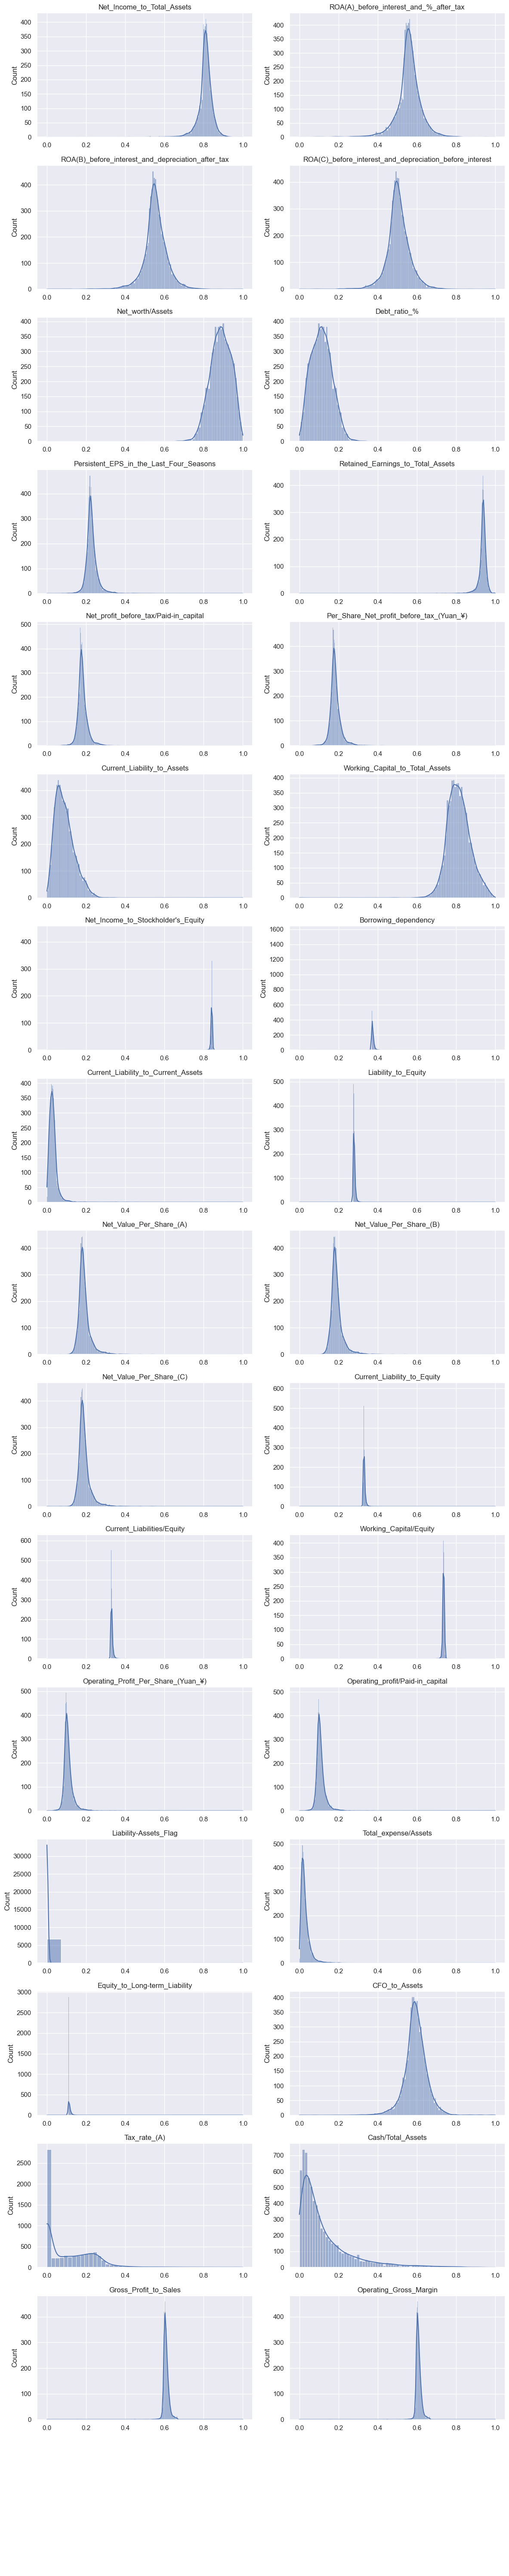

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have imported seaborn as sns
# Assuming df is your DataFrame and features_with_correlation is your list of features

# Melt the DataFrame
f = pd.melt(CBP_df, value_vars=features_with_correlation)

# Create a FacetGrid-like plot with matplotlib
fig, axes = plt.subplots(len(features_with_correlation) // 2 + 1, 2, figsize=(12, 60))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each feature and create a histogram
for i, feature in enumerate(features_with_correlation):
    sns.histplot(data=f[f['variable'] == feature], x='value', kde=True, ax=axes[i])
    axes[i].set_title(feature)
    axes[i].set_xlabel('')

# Hide the extra subplots
for j in range(len(features_with_correlation), len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



We conducted a comprehensive analysis by plotting histograms for 33 individual features, aiming to evaluate their distributions and their potential correlations with the target variable.
Among our findings, it was evident that the Net Income of total asset column, ROA(B), ROA(C), and the ROA(A) before interest columns displayed a discernible adherence to a normal distribution pattern. This comprehensive analysis sheds light on the underlying relationships between these features and the target variable, providing valuable insights for further investigation.


### Bivariate Analysis with features with target variable

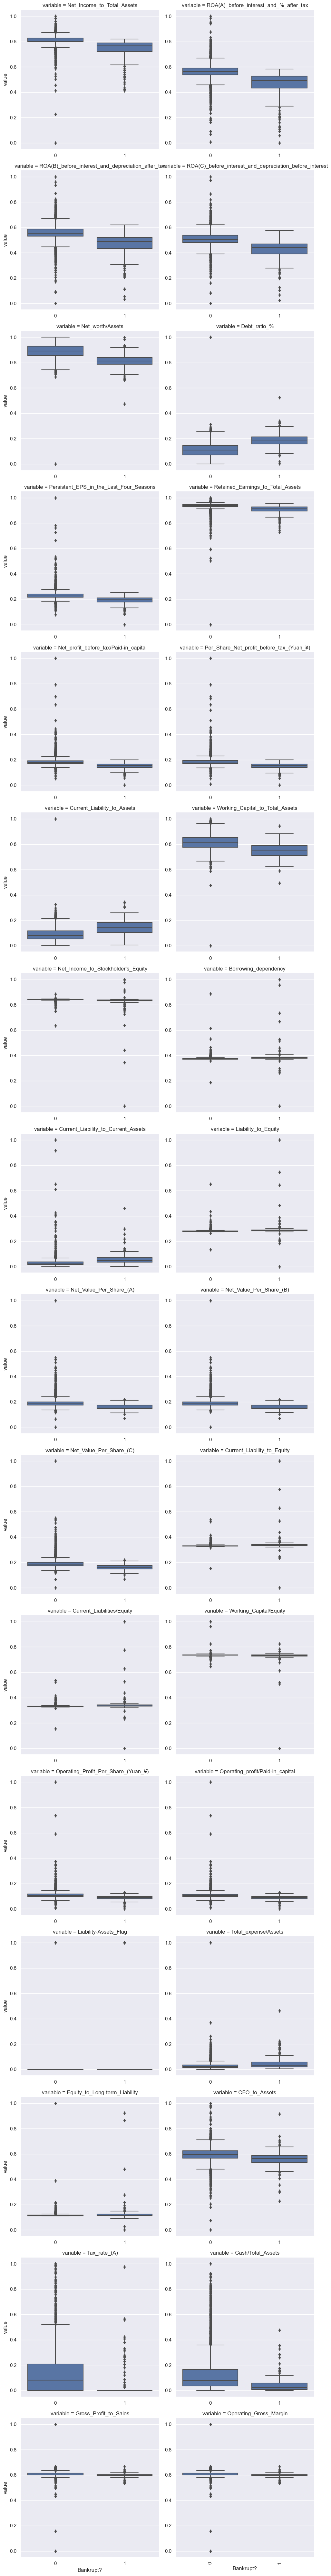

In [22]:
import seaborn as sns
import pandas as pd

# Assuming CBP_df is your DataFrame and features_with_correlation is your list of features

# Melt the DataFrame
f = pd.melt(CBP_df, id_vars=['Bankrupt?'], value_vars=features_with_correlation)

# Create a FacetGrid
g = sns.FacetGrid(f, col="variable", col_wrap=2, sharex=False, sharey=False, height=5)

# Map the boxplot function to the FacetGrid
g = g.map(sns.boxplot, "Bankrupt?", "value")

# Adjust layout
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.tight_layout()

# Show the plot
plt.show()


The provided box plot illustrates the distribution of each of the 33 highly correlated features concerning the target variable, which takes on values of either 0 or 1. Utilizing the box plot, we were able to effectively compare the outcome values for each variable and identify any outliers present in the dataset. This visualization technique not only facilitated the examination of the relationship between features and the target variable but also provided a clear depiction of any data points that deviate significantly from the overall pattern. The box plot's ability to present the central tendency, spread, and outliers in a concise manner makes it an excellent visual tool for conducting such analyses.

### Outlier Analysis

In [23]:
X = CBP_df.drop(["Bankrupt?"],axis=1)
y = CBP_df["Bankrupt?"].values

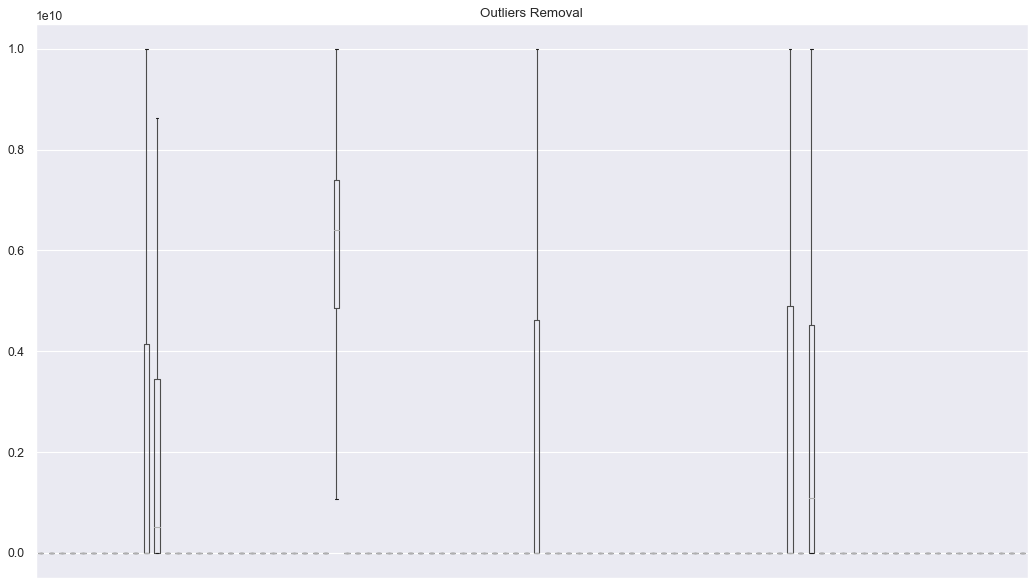

All outliers have been fully handled.
Processing rules:
Outliers larger than the upper quartile are replaced with upper quartile values.
Outliers smaller than the lower quartile are replaced with lower quartile values.


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def box_quartile(x):
    x = sorted(x)
    Q1, Q3 = np.percentile(x, [25, 75])
    IQR = Q3 - Q1
    low = Q1 - IQR * 1.5
    up = Q3 + IQR * 1.5
    return low, up

def rm_outlier(df):
    for i in df.columns:
        low, up = box_quartile(df[i])
        df[i] = np.where(df[i] > up, up, df[i])
        df[i] = np.where(df[i] < low, low, df[i])
    return df

X = rm_outlier(X)

plt.figure(figsize=(16, 9), dpi=80)
X.boxplot(vert=True, patch_artist=False)
plt.xticks([])
plt.title('Outliers Removal')
plt.show()

print("All outliers have been fully handled.")
print("Processing rules:")
print("Outliers larger than the upper quartile are replaced with upper quartile values.")
print("Outliers smaller than the lower quartile are replaced with lower quartile values.")


To identify outliers in data, the interquartile range is frequently utilized. Observations that are above Q3 + 1.5 IQR or below Q1 − 1.5 IQR are considered outliers in this context. A statistic that represents the spread of the middle half or middle 50% of the data is called the interquartile range. Outliers are defined as data points that are more than 1.5 times the IQR from Q1 or Q3. We are considering all of the data points rather than designating them as outliers because we can see that they are highly dispersed over the interquartile range.

## Class Imbalance:

Balanced Class Bankrupt using SMOTE technique

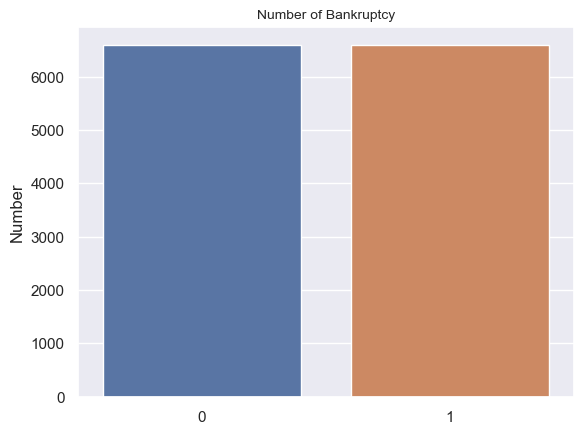

In [25]:
from imblearn.over_sampling import SMOTE
import seaborn as sns

# using smote oversampling to correct unbalanced data
smote = SMOTE()
X,y=smote.fit_resample(X,y)
sns.countplot(x=y)
plt.ylabel("Number")
plt.title('Number of Bankruptcy', fontsize = 10)
plt.show()



# Concatenate X_resampled and y_resampled along columns (axis=1) to create a single DataFrame
df_resampled = pd.concat([pd.DataFrame(X, columns=X.columns), pd.Series(y, name='Bankrupt?')], axis=1)

# Print the first few rows of the resampled DataFrame



From the fig above, we can now see that the dataset is balanced for both the classes after the application of SMOTE algorithm.

In [26]:
display(df_resampled.head())

display(df_resampled.info())

ROA(C)_before_interest_and_depreciation_before_interest  \
0                                           0.387973         
1                                           0.464291         
2                                           0.426071         
3                                           0.399844         
4                                           0.465022         

   ROA(A)_before_interest_and_%_after_tax  \
0                                0.455122   
1                                0.538214   
2                                0.499019   
3                                0.455122   
4                                0.538432   

   ROA(B)_before_interest_and_depreciation_after_tax  Operating_Gross_Margin  \
0                                           0.442034                0.601457   
1                                           0.516730                0.610235   
2                                           0.472295                0.601450   
3                                           0.457733                0.583541   
4                                           0.522298                0.598783   

   Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
0                     0.601457               0.998969   
1                     0.610235               0.998946   
2                     0.601364               0.998857   
3                     0.583541               0.998781   
4                     0.598783               0.998973   

   Pre-tax_net_Interest_Rate  After-tax_net_Interest_Rate  \
0                   0.797096                     0.809075   
1                   0.797380                     0.809301   
2                   0.797096                     0.809075   
3                   0.797096                     0.809075   
4                   0.797366                     0.809304   

   Non-industry_income_and_expenditure/revenue  \
0                                     0.303288   
1                                     0.303556   
2                                     0.303288   
3                                     0.303350   
4                                     0.303475   

   Continuous_interest_rate_(after_tax)  ...  Net_Income_to_Total_Assets  \
0                              0.781314  ...                    0.752193   
1                              0.781506  ...                    0.795297   
2                              0.781314  ...                    0.774670   
3                              0.781314  ...                    0.752193   
4                              0.781550  ...                    0.795016   

   Total_assets_to_GNP_price  No-credit_Interval  Gross_Profit_to_Sales  \
0                   0.009219            0.622879               0.601453   
1                   0.008323            0.623652               0.610237   
2                   0.011819            0.623841               0.601449   
3                   0.003252            0.622929               0.583538   
4                   0.003878            0.623521               0.598782   

   Net_Income_to_Stockholder's_Equity  Liability_to_Equity  \
0                            0.836752             0.288207   
1                            0.839969             0.283846   
2                            0.836774             0.288207   
3                            0.836752             0.281721   
4                            0.839973             0.278514   

   Degree_of_Financial_Leverage_(DFL)  \
0                            0.026608   
1                            0.027096   
2                            0.026608   
3                            0.026697   
4                            0.026608   

   Interest_Coverage_Ratio_(Interest_expense_to_EBIT)  Equity_to_Liability  \
0                                           0.564309              0.016469   
1                                           0.566574              0.020794   
2                                           0.564309              0.016474   
3                          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13198 entries, 0 to 13197
Data columns (total 95 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   ROA(C)_before_interest_and_depreciation_before_interest  13198 non-null  float64
 1   ROA(A)_before_interest_and_%_after_tax                   13198 non-null  float64
 2   ROA(B)_before_interest_and_depreciation_after_tax        13198 non-null  float64
 3   Operating_Gross_Margin                                   13198 non-null  float64
 4   Realized_Sales_Gross_Margin                              13198 non-null  float64
 5   Operating_Profit_Rate                                    13198 non-null  float64
 6   Pre-tax_net_Interest_Rate                                13198 non-null  float64
 7   After-tax_net_Interest_Rate                              13198 non-null  float64
 8   Non-industry_income_and_ex

None

We have implemented SMOTE technique to balance dataset.

SMOTE (Synthetic Minority Over-sampling Technique) is a method used to address imbalanced datasets in machine learning. It works by creating synthetic samples of the minority class to balance the class distribution. By generating new instances based on existing minority class samples, SMOTE helps improve model performance, reduce bias, and enable better generalization.

Now, an equal number of rows can be observed in the "Bankrupt" column for both 0 (not bankrupt) and 1 (bankrupt) values, indicating a balanced representation of the two classes.

## Feature Engineering

Feature engineering is the process of transforming raw data into a format that is suitable for machine learning algorithms to extract meaningful patterns and make accurate predictions. It involves creating new features from existing ones, selecting relevant features, and transforming features to improve model performance.

In this we will apply both dimension reduction and feature selection techniques on dataset


### Dimension reduction:

Principal Component Analysis (PCA) :
PCA, or Principal Component Analysis, is a statistical technique used for dimensionality reduction in data analysis. It aims to transform a dataset containing possibly correlated variables into a set of linearly uncorrelated variables called principal components. These components capture the maximum variance in the data, allowing for a simplified representation while retaining the essential information present in the original dataset.



### Normalizing the dataset

In [27]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = df_resampled.drop('Bankrupt?', axis=1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Create a new DataFrame with the scaled features
df_scaled = pd.DataFrame(data=X_scaled, columns=X.columns)
df_scaled['Bankrupt?'] = df_resampled['Bankrupt?']

# Display the first few rows of the scaled DataFrame
print("\nScaled Dataset:")
display(df_scaled.head())



Scaled Dataset:


ROA(C)_before_interest_and_depreciation_before_interest  \
0                                          -1.516202         
1                                          -0.142915         
2                                          -0.830655         
3                                          -1.302599         
4                                          -0.129757         

   ROA(A)_before_interest_and_%_after_tax  \
0                               -1.359023   
1                                0.185421   
2                               -0.543105   
3                               -1.359023   
4                                0.189474   

   ROA(B)_before_interest_and_depreciation_after_tax  Operating_Gross_Margin  \
0                                          -1.461981               -0.221164   
1                                          -0.090922                0.609321   
2                                          -0.906531               -0.221846   
3                                          -1.173815               -1.916226   
4                                           0.011275               -0.474128   

   Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
0                    -0.223042               0.047394   
1                     0.610427              -0.139095   
2                    -0.231938              -0.850722   
3                    -1.924194              -1.461913   
4                    -0.476915               0.078939   

   Pre-tax_net_Interest_Rate  After-tax_net_Interest_Rate  \
0                  -1.230011                    -1.182266   
1                   0.169208                     0.146802   
2                  -1.230011                    -1.182266   
3                  -1.230011                    -1.182266   
4                   0.099639                     0.164441   

   Non-industry_income_and_expenditure/revenue  \
0                                    -1.266460   
1                                     0.757554   
2                                    -1.266460   
3                                    -0.801902   
4                                     0.143609   

   Continuous_interest_rate_(after_tax)  ...  Net_Income_to_Total_Assets  \
0                             -1.169582  ...                   -1.277346   
1                             -0.103180  ...                    0.141617   
2                             -1.169582  ...                   -0.537423   
3                             -1.169582  ...                   -1.277346   
4                              0.141594  ...                    0.132358   

   Total_assets_to_GNP_price  No-credit_Interval  Gross_Profit_to_Sales  \
0                   1.246339           -1.463498              -0.221364   
1                   1.010772           -0.125052               0.609607   
2                   1.929688            0.202806              -0.221738   
3                  -0.322195           -1.377333              -1.916343   
4                  -0.157878           -0.352018              -0.474138   

   Net_Income_to_Stockholder's_Equity  Liability_to_Equity  \
0                           -1.211585             1.436705   
1                            0.123394             0.423997   
2                           -1.202145             1.436705   
3                           -1.211585            -0.069462   
4                            0.124837            -0.814348   

   Degree_of_Financial_Leverage_(DFL)  \
0                           -1.261258   
1                            2.023086   
2                           -1.261258   
3                           -0.665641   
4                           -1.261258   

   Interest_Coverage_Ratio_(Interest_expense_to_EBIT)  Equity_to_Liability  \
0                                          -1.322512             -0.737278   
1                                           1.932240             -0.531405   
2                                          -1.322512             -0.737022   
3                          

### Implementing PCA

In [28]:
# Import necessary libraries
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA()

# Fit PCA on the scaled data
pca.fit(df_scaled)

pcsSummary_scale = pd.DataFrame({'Explained Variance': pca.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pca.explained_variance_ratio_)})
pcsSummary_scale = pcsSummary_scale.transpose()
pcsSummary_scale.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_scale.columns) + 1)]
display(pcsSummary_scale)

# Explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Determine the number of principal components to retain (let's say 95% variance)
n_components_retained = (cumulative_explained_variance >= 0.99).argmax() + 1

print("\nCumulative Explained Variance:")
print(cumulative_explained_variance)

# Display the number of principal components to retain
print(f"\nNumber of Principal Components to Retain (99% Variance): {n_components_retained}")


# pcsComponents_scale = pd.DataFrame(pca.components_.transpose(), columns=X.columns, 
#                                 index=X.columns)
# print(pcsComponents_scale.iloc[:,:2])


PC1       PC2       PC3       PC4       PC5  \
Explained Variance     0.329133  0.098984  0.080642  0.046210  0.037174   
Cumulative proportion  0.329133  0.428117  0.508759  0.554969  0.592143   

                            PC6       PC7       PC8       PC9      PC10  ...  \
Explained Variance     0.034398  0.032539  0.029420  0.023596  0.022568  ...   
Cumulative proportion  0.626540  0.659080  0.688499  0.712095  0.734664  ...   

                           PC86      PC87      PC88      PC89      PC90  \
Explained Variance     0.000020  0.000009  0.000008  0.000004  0.000001   
Cumulative proportion  0.999977  0.999986  0.999994  0.999999  1.000000   

                               PC91          PC92          PC93          PC94  \
Explained Variance     1.544349e-10  9.775953e-32  6.491005e-32  2.570367e-33   
Cumulative proportion  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   

                               PC95  
Explained Variance     2.570367e-33  
Cumulative proportion  1.000000e+00  

[2 rows x 95 columns]


Cumulative Explained Variance:
[0.32913303 0.4281174  0.50875915 0.55496898 0.59214268 0.62654049
 0.6590796  0.6884993  0.71209525 0.73466352 0.75457622 0.77247544
 0.78717726 0.80094569 0.81298411 0.8244691  0.8348871  0.84509957
 0.85474111 0.86366613 0.87187837 0.87999013 0.8876723  0.89493858
 0.90214889 0.90900123 0.91523061 0.92130233 0.92652539 0.93161458
 0.93649012 0.94085184 0.94504861 0.94905805 0.95270864 0.95612136
 0.95903593 0.96163613 0.96417489 0.96643247 0.96854684 0.9705356
 0.97245953 0.97426524 0.9759545  0.97752528 0.97906723 0.98055104
 0.98196101 0.983264   0.98451036 0.98571104 0.98687718 0.9879536
 0.98898885 0.98992941 0.99077826 0.99158351 0.99234616 0.9930529
 0.99374728 0.99440308 0.99497604 0.99551691 0.99601595 0.99646634
 0.99686402 0.99721953 0.99755841 0.99788797 0.99819072 0.99847438
 0.99872297 0.99895933 0.99916492 0.99934682 0.99946769 0.99958155
 0.99967768 0.99975624 0.99981079 0.99986162 0.99989675 0.99993008
 0.99995737 0.9999771  0.99998639

Compared to all other components, the first principal component (PC1) accounts for a significantly larger portion of the data variance—roughly 33%. This indicates that PC1 finds the most significant pattern or piece of information in the data. Most of the information is included in the first few components, as evidenced by the explained variance rapidly decreasing as additional components are added. The cumulative percentage of variance shows that 99% of the volatility in the data can be explained by 57 components. This indicates that practically all the data in the original dataset can be represented by 57 components.

### we can see from above that 57 components contain 99% of the variance

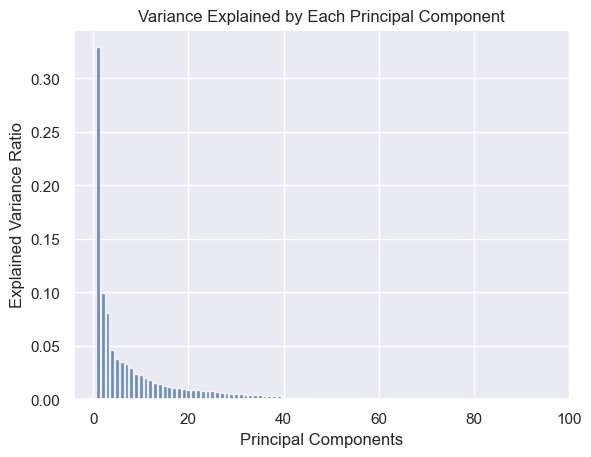

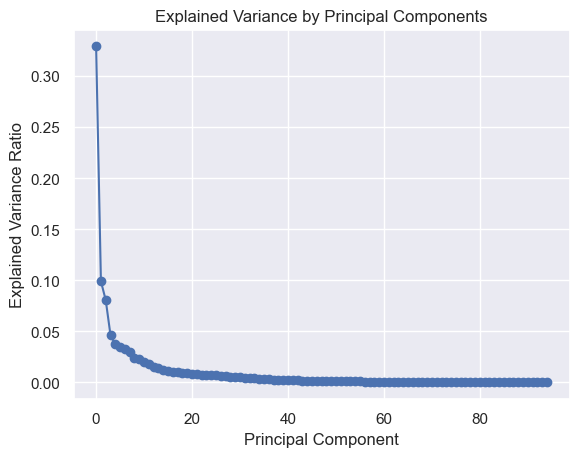

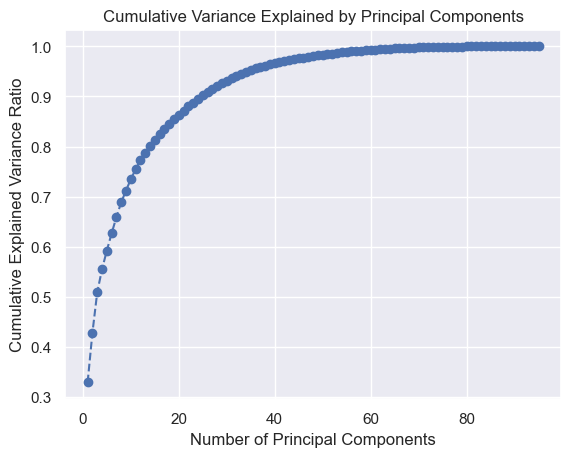

In [29]:
# Create a plot to visualize the variance explained by each principal component
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.8, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Variance Explained by Each Principal Component')
plt.show()

# Plot explained variance by each principal component
plt.plot(explained_variance_ratio, marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Calculate and plot the cumulative variance explained by the principal components
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Variance Explained by Principal Components')
plt.show()


A considerable portion of the variance in the data may be explained by the first few principal components, but for higher-order components, this quickly diminishes. This indicates that most of the information is present in the first several components, and there would be little benefit to adding more. 
The plot displays an elbow around the tenth principal component, which is where the curve's slope drastically varies. This shows that, to balance the trade-off between complexity and information loss, 10 components are a suitable number to preserve.
Additionally, the graphic demonstrates that about 40 primary components are required to account for 90% of the variance in the data. This indicates that nearly all the information in the can be represented by 40 components.

### Plotting first 2 principal components

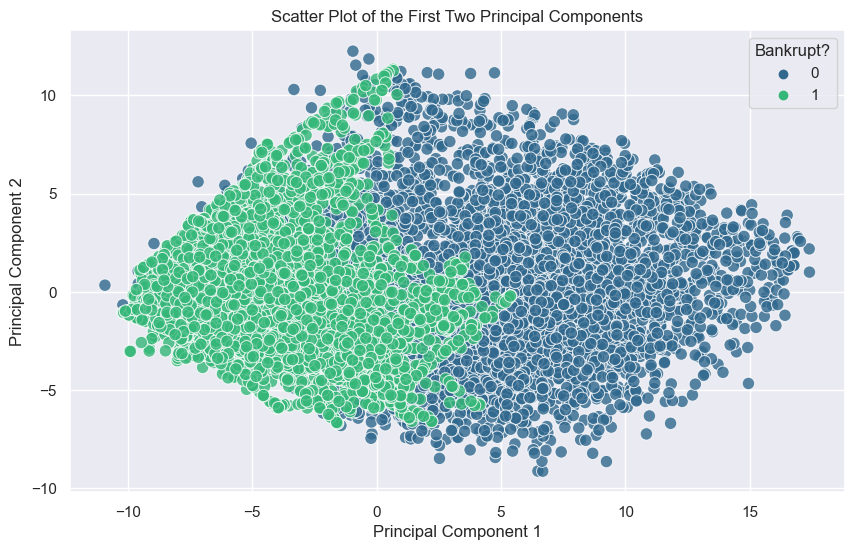

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Transform the original scaled data to the first two principal components
pca_result = pca.transform(df_scaled)[:, :2]

# Create a DataFrame for the first two principal components
df_pca = pd.DataFrame(data=pca_result, columns=['Principal Component 1', 'Principal Component 2'])
df_pca['Bankrupt?'] = df_scaled['Bankrupt?']

# Plot the first two principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Bankrupt?', data=df_pca, palette='viridis', s=80, alpha=0.8)
plt.title('Scatter Plot of the First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Bankrupt?')
plt.show()


The figure displays two alternative color-coded clusters of data points that indicate whether a company is bankrupt (1) or not (0). This suggests that the companies can be efficiently divided by the first two main components according to their bankruptcy state, which may be a helpful predictor or indication of financial performance.
Companies that are not in bankruptcy are represented by the green dots, and those that are represented by the blue dots. Although there is considerable overlap, the two groups usually form separate clusters. This implies that each group of companies shares certain traits or patterns, although the groups also differ or vary from one another.
About 50% of the variance in the data is explained by the first two principal components, which is a rather significant percentage when compared to other components. This indicates that the most significant information or patterns in the data are captured by these two components. A few outliers are also depicted in the plot for both groups, particularly for the bankrupt group. These are entities whose principal component values deviate significantly from those of most of their group. These might be the result of extraordinary work, fraud, mistakes in accounting, or other causes.

### Feature Selection

### Feature selection using mutual info classifier

mutual_info_classif is a function in scikit-learn used for feature selection in classification tasks. It computes the mutual information between each feature and the target variable, helping identify the most informative features. Higher scores indicate greater relevance to predicting the target. It's useful for improving model performance and reducing overfitting.

 
 Top features with high mutual information


Total_Asset_Turnover                                       0.504964
Operating_Profit_Per_Share_(Yuan_¥)                        0.435387
Persistent_EPS_in_the_Last_Four_Seasons                    0.434496
Per_Share_Net_profit_before_tax_(Yuan_¥)                   0.418556
Net_Worth_Turnover_Rate_(times)                            0.413512
Total_Asset_Growth_Rate                                    0.359008
Cash_Flow_Per_Share                                        0.348347
Interest-bearing_debt_interest_rate                        0.345334
Net_Income_to_Total_Assets                                 0.324520
Continuous_interest_rate_(after_tax)                       0.320079
ROA(C)_before_interest_and_depreciation_before_interest    0.317114
Net_profit_before_tax/Paid-in_capital                      0.315428
ROA(A)_before_interest_and_%_after_tax                     0.306466
Retained_Earnings_to_Total_Assets                          0.303072
ROA(B)_before_interest_and_depreciation_after_ta

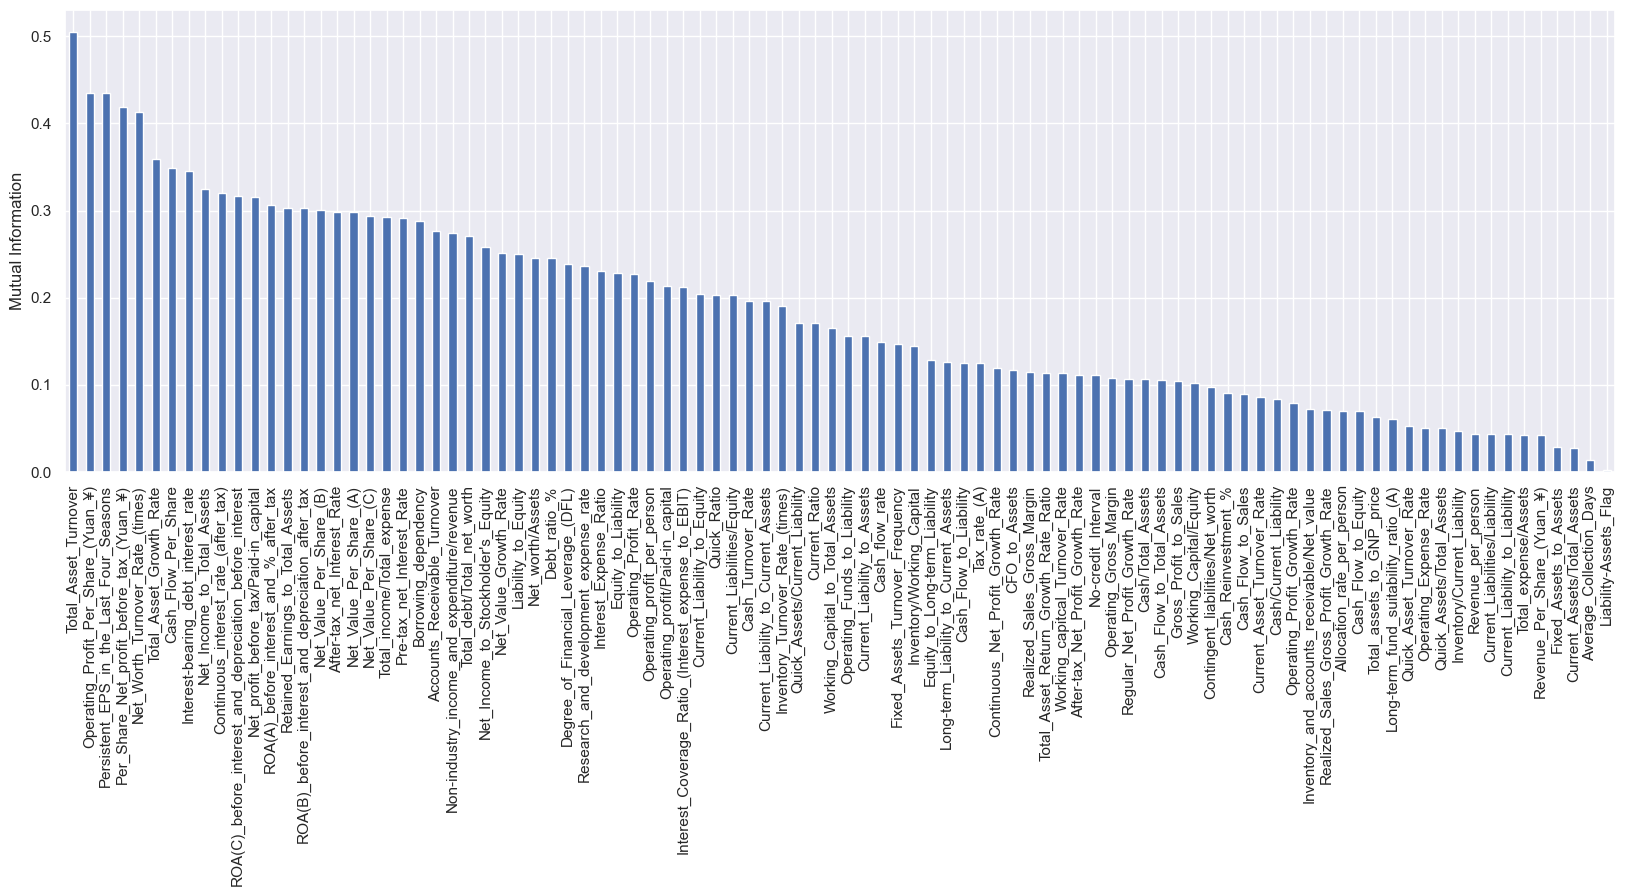

In [31]:
from sklearn.feature_selection import mutual_info_classif
train_X, test_X, train_y, test_y = train_test_split(
    df_scaled.drop(labels=['Bankrupt?'], axis=1),
    df_scaled['Bankrupt?'],
    test_size=0.25,
    random_state=42)
mi = mutual_info_classif(train_X, train_y)
mi = pd.Series(mi)
mi.index = train_X.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel('Mutual Information')


# Print the mutual information scores
print(' \n Top features with high mutual information')
display(mi.sort_values(ascending=False).head(40))

Mutual Information values between all the features and the target variable is calculated. Suppose if we have smaller mutual information value, then we can get less information about the target from the feature. 
The above histogram illustrates that there are few features which have higher mutual values and few others have almost zero mutual information values. The features are sorted on the basis of mutual information value.


### Feature selection using SelectKBest
SelectKBest is a feature selection method in scikit-learn that selects the top k features based on statistical tests. It helps in reducing the dimensionality of the dataset and improving model performance by retaining only the most informative features. You can specify the scoring function and the number of features to select (k) as parameters.

In [32]:
from sklearn.feature_selection import SelectKBest
sel_ = SelectKBest(mutual_info_classif, k=20).fit(train_X, train_y)
print('\n Important features in dataset')
display(train_X.columns[sel_.get_support()])


 Important features in dataset


Index(['ROA(C)_before_interest_and_depreciation_before_interest',
       'ROA(A)_before_interest_and_%_after_tax',
       'ROA(B)_before_interest_and_depreciation_after_tax',
       'Pre-tax_net_Interest_Rate', 'After-tax_net_Interest_Rate',
       'Continuous_interest_rate_(after_tax)',
       'Interest-bearing_debt_interest_rate', 'Net_Value_Per_Share_(B)',
       'Net_Value_Per_Share_(A)', 'Net_Value_Per_Share_(C)',
       'Persistent_EPS_in_the_Last_Four_Seasons', 'Cash_Flow_Per_Share',
       'Operating_Profit_Per_Share_(Yuan_¥)',
       'Per_Share_Net_profit_before_tax_(Yuan_¥)', 'Total_Asset_Growth_Rate',
       'Net_profit_before_tax/Paid-in_capital', 'Total_Asset_Turnover',
       'Net_Worth_Turnover_Rate_(times)', 'Retained_Earnings_to_Total_Assets',
       'Net_Income_to_Total_Assets'],
      dtype='object')

## Conclusion of Featute Engineering(Dimension reduction & Feature Selection)

In the process of feature engineering and selection, we explored multiple techniques to enhance the predictive power and efficiency of our model.

1.Principal Component Analysis (PCA) was utilized to tackle the dimensionality of our dataset, comprising 95 feature variables and 1 target variable. Remarkably, employing PCA revealed that a subset of 57 principal components captures 99% of the variance in our data. Additionally, we visualized the cumulative and explained variance ratios via an elbow plot, providing insights into the optimal number of principal components required for effective dimensionality reduction.

2.We employed the mutual_info_classif feature selection technique, which computes the mutual information between each feature and the target variable. Setting a threshold of 0.2, we identified approximately 40 columns demonstrating high mutual information with the target. This approach allowed us to focus on the most relevant features for predictive modeling.

3.The SelectKBest feature selection method was also applied, with k set to 40. Intriguingly, a significant overlap was observed between the features selected by mutual_info_classif and SelectKBest, reinforcing the importance of the identified features.


In deliberating between these techniques, mutual_info_classif emerged as the preferred method. Not only did it effectively reduce the dimensionality of our feature space, but it also exhibited considerable consistency with the SelectKBest approach. Furthermore, the flexibility to adjust the threshold in mutual_info_classif based on performance metrics in subsequent classification tasks adds an additional layer of adaptability to our feature selection process.

By leveraging mutual_info_classif as our primary feature selection method, we can confidently streamline our model's input space while ensuring that only the most informative features are retained, ultimately contributing to improved model performance and interpretability.



## Recommended List of Features:

Below are the columns or features selected using the mutual_info_classif feature selection method that most accurately describe our target variable 'Bankrupt?'

In [33]:
print(' \n Top features with high mutual information')
display(mi.sort_values(ascending=False).head(40))

 
 Top features with high mutual information


Total_Asset_Turnover                                       0.504964
Operating_Profit_Per_Share_(Yuan_¥)                        0.435387
Persistent_EPS_in_the_Last_Four_Seasons                    0.434496
Per_Share_Net_profit_before_tax_(Yuan_¥)                   0.418556
Net_Worth_Turnover_Rate_(times)                            0.413512
Total_Asset_Growth_Rate                                    0.359008
Cash_Flow_Per_Share                                        0.348347
Interest-bearing_debt_interest_rate                        0.345334
Net_Income_to_Total_Assets                                 0.324520
Continuous_interest_rate_(after_tax)                       0.320079
ROA(C)_before_interest_and_depreciation_before_interest    0.317114
Net_profit_before_tax/Paid-in_capital                      0.315428
ROA(A)_before_interest_and_%_after_tax                     0.306466
Retained_Earnings_to_Total_Assets                          0.303072
ROA(B)_before_interest_and_depreciation_after_ta

As we keep working, we know it's important to change the threshold values based on how well our classification models are doing. This helps us fine-tune our feature selection method over time, so we find the right balance between including features and making sure our model works well. By checking how different threshold values affect our model's performance, we can adjust our approach to make sure we're capturing the most important patterns in the data and making our model more reliable.

### Model Implementation

In [34]:

#Taking top 10 important column to predict

# Ensure that the column names in your DataFrame match those you're providing
X_columns = [
    "ROA(C)_before_interest_and_depreciation_before_interest",
    "ROA(A)_before_interest_and_%_after_tax",
    "Persistent_EPS_in_the_Last_Four_Seasons",
    "Per_Share_Net_profit_before_tax_(Yuan_¥)",
    "Borrowing_dependency",
    "Net_profit_before_tax/Paid-in_capital",
    "Net_Income_to_Total_Assets",
    "Net_Income_to_Stockholder's_Equity",
    "Degree_of_Financial_Leverage_(DFL)",
    "Interest_Coverage_Ratio_(Interest_expense_to_EBIT)"
]

# Ensure exact match of column names
X = df_resampled[X_columns]
y =df_resampled['Bankrupt?']

X.head()


ROA(C)_before_interest_and_depreciation_before_interest  \
0                                           0.387973         
1                                           0.464291         
2                                           0.426071         
3                                           0.399844         
4                                           0.465022         

   ROA(A)_before_interest_and_%_after_tax  \
0                                0.455122   
1                                0.538214   
2                                0.499019   
3                                0.455122   
4                                0.538432   

   Persistent_EPS_in_the_Last_Four_Seasons  \
0                                 0.178548   
1                                 0.208944   
2                                 0.180581   
3                                 0.193722   
4                                 0.212537   

   Per_Share_Net_profit_before_tax_(Yuan_¥)  Borrowing_dependency  \
0                                  0.138736              0.385425   
1                                  0.169918              0.376760   
2                                  0.142803              0.379093   
3                                  0.148603              0.379743   
4                                  0.168412              0.375025   

   Net_profit_before_tax/Paid-in_capital  Net_Income_to_Total_Assets  \
0                               0.137757                    0.752193   
1                               0.168962                    0.795297   
2                               0.148036                    0.774670   
3                               0.147561                    0.752193   
4                               0.167461                    0.795016   

   Net_Income_to_Stockholder's_Equity  Degree_of_Financial_Leverage_(DFL)  \
0                            0.836752                            0.026608   
1                            0.839969                            0.027096   
2                            0.836774                            0.026608   
3                            0.836752                            0.026697   
4                            0.839973                            0.026608   

   Interest_Coverage_Ratio_(Interest_expense_to_EBIT)  
0                                           0.564309   
1                                           0.566574   
2                                           0.564309   
3                                           0.564663   
4                                           0.566574

In [35]:
#Normalizing the data

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)


In [36]:
# Splitting Data into train and test
train_X, test_X, train_y, test_y = train_test_split(X_scaled,y,test_size=0.25,random_state=42)


### Logistic Regression

Logistic Regression is a linear classification algorithm that models the probability of the default class (often labeled as 1) given input features. It's commonly used for binary classification problems, where the target variable has two possible outcomes. Despite its name, logistic regression is a regression model but used for classification tasks. It makes predictions using the logistic function to constrain the output between 0 and 1, interpreting them as probabilities. It's a straightforward yet powerful algorithm that is computationally efficient and interpretable, making it a popular choice in various fields such as healthcare, finance, and marketing.

In [37]:
print("Use Logistic Regression to evaluate on the validation set")
lr = LogisticRegression()
lr.fit(train_X, train_y)
pred_y = lr.predict(test_X)
auc = metrics.roc_auc_score(test_y,lr.predict_proba(test_X)[:,-1])
print("auc:",auc)
acc_score = accuracy_score(test_y, pred_y)
print("accuracy score:",acc_score)
print('Classification Report: \n', classification_report(test_y, pred_y, digits=3))

Use Logistic Regression to evaluate on the validation set
auc: 0.9546179548930955
accuracy score: 0.8918181818181818
Classification Report: 
               precision    recall  f1-score   support

           0      0.907     0.876     0.891      1666
           1      0.878     0.908     0.893      1634

    accuracy                          0.892      3300
   macro avg      0.892     0.892     0.892      3300
weighted avg      0.892     0.892     0.892      3300



The Logistic Regression model achieved an Area Under the Curve (AUC) score of 0.95 and an accuracy score of 0.892 when evaluated on the validation set. These scores indicate that the model performs well in distinguishing between the two classes.

Looking at the classification report, we see that the precision, recall, and F1-score for both classes (0 and 1) are relatively high, indicating a good balance between correctly identifying positive and negative cases.

The precision, which measures the proportion of true positive predictions among all positive predictions, is 0.907 for class 0 and 0.878 for class 1. The recall, which measures the proportion of true positives that were correctly identified, is 0.876 for class 0 and 0.908 for class 1. The F1-score, which is the harmonic mean of precision and recall, is 0.891 for class 0 and 0.893 for class 1.

Overall, the model demonstrates good predictive performance on the validation set, with balanced precision, recall, and F1-score for both classes, indicating its effectiveness in classification tasks.

### Cross Validation logistic Regression

We did cross validation using 2 methods:

1. KFold Cross-Validation: Splits the dataset into k folds, iteratively training the model on k-1 folds and validating on the remaining fold. Suitable for large datasets, providing robust estimates of model performance.

2. StratifiedKFold Cross-Validation: An extension of KFold that preserves the class distribution in each fold, ensuring balanced representation of classes. Particularly useful for classification tasks with imbalanced datasets, offering more reliable evaluation results.


In [38]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression


# Define the models
models = {
    'Logistic Regression': LogisticRegression()  
}

#k-fold cross-validation
cv_strategy = KFold(n_splits=5, shuffle=True)  

# Perform cross-validation for each model
for model_name, model in models.items():
    scores = cross_val_score(model, train_X, train_y, cv=cv_strategy, scoring='accuracy')
    print('K-fold Cross Validation \n')
    print(f"{model_name}: Mean Accuracy = {scores.mean()}, Std Deviation = {scores.std()}")
    print('\n')

# stratified k-fold cross-validation
cv_strategy_stratified = StratifiedKFold(n_splits=5, shuffle=True)
for model_name, model in models.items():
    scores = cross_val_score(model, train_X, train_y, cv=cv_strategy_stratified, scoring='accuracy')
    print('Stratified K-fold Cross Validation \n')
    print(f"{model_name}: Mean Accuracy = {scores.mean()}, Std Deviation = {scores.std()}")

K-fold Cross Validation 

Logistic Regression: Mean Accuracy = 0.898363166786613, Std Deviation = 0.003435451396991009


Stratified K-fold Cross Validation 

Logistic Regression: Mean Accuracy = 0.8980603406475058, Std Deviation = 0.005952541878567572


When we compare K-fold Cross Validation and Stratified K-fold Cross Validation for Logistic Regression, we see that both methods give similar average accuracy scores. However, the Stratified K-fold method has a slightly higher average accuracy score. But, it also shows a bit more variation in the accuracy scores across different tests. This difference might be because the Stratified K-fold method keeps the same proportion of classes in each test, making it more representative, especially when dealing with datasets where some classes have many more examples than others. Overall, both methods give us a good idea of how well our model performs, but the Stratified K-fold method might be a bit more stable, especially when classes are imbalanced.

### Hyperparameter Tuning Logistic Regression

We have used 2 methods for hyperparameter tuning:

1. GridSearchCV: Exhaustively searches through a predefined grid of hyperparameters, evaluating model performance for each combination using cross-validation. Suitable for small parameter spaces but computationally expensive for larger ones.

2. RandomizedSearchCV: Randomly samples hyperparameter settings from specified distributions, exploring a subset of hyperparameters. More efficient for large search spaces, offering good results with less computational cost, though it does not guarantee finding the optimal hyperparameters.

In [39]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

models = {
    'Logistic Regression': LogisticRegression()
}

# Define hyperparameters for grid search
param_grid = {
    'Logistic Regression': {'C': [0.1, 1, 10]}
}

# Define hyperparameters for random search
param_distributions = {
    'Logistic Regression': {'C': [0.1, 1, 10]}
}

# Perform grid search for each model
for model_name, model in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid[model_name], cv=5, scoring='accuracy')
    grid_search.fit(train_X, train_y)
    print('Hyperparameter tuning with grid serach \n')
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {model_name}: {grid_search.best_score_}")
    print('\n')

# Perform random search for each model
for model_name, model in models.items():
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions[model_name], 
                                       n_iter=10, cv=5, scoring='accuracy', random_state=42)
    random_search.fit(train_X, train_y)
    print('Hyperparameter tuning with random serach \n')
    print(f"Best parameters for {model_name}: {random_search.best_params_}")
    print(f"Best cross-validation score for {model_name}: {random_search.best_score_}")


Hyperparameter tuning with grid serach 

Best parameters for Logistic Regression: {'C': 0.1}
Best cross-validation score for Logistic Regression: 0.899475349758321


Hyperparameter tuning with random serach 

Best parameters for Logistic Regression: {'C': 0.1}
Best cross-validation score for Logistic Regression: 0.899475349758321


Both grid search and random search techniques resulted in the same optimal parameter value (C=1) for the Logistic Regression model. The best cross-validation score achieved was approximately 0.899, indicating the model's performance across different parameter settings. These results suggest that the chosen parameter effectively optimized the model's performance.

### Plotting Confustion Matrix and ROC Curve

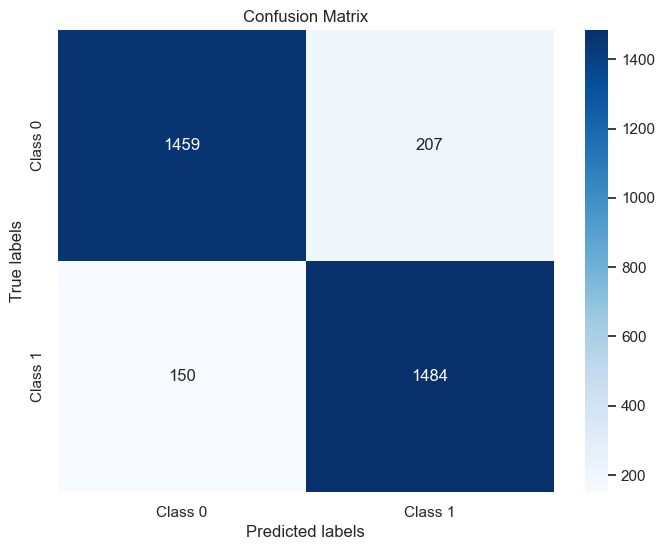

<Axes: title={'center': 'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

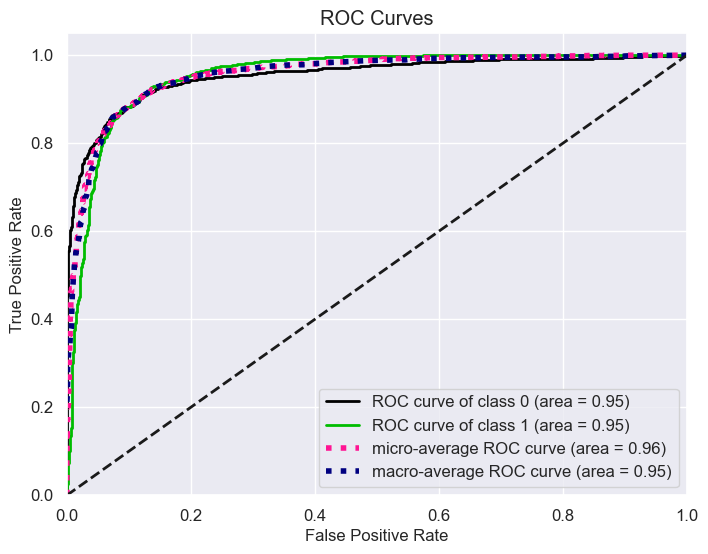

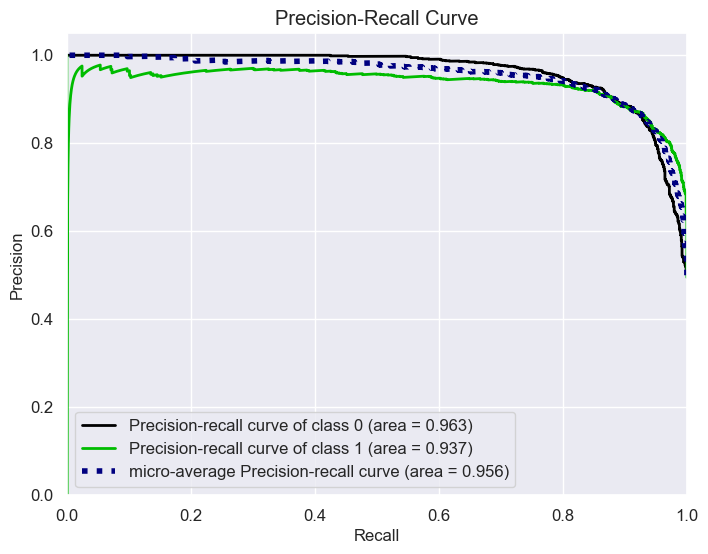

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Assuming lr is your logistic regression model and test_X, test_y are your test data
predicted_labels = lr.predict(test_X)
plot_confusion_matrix(test_y, predicted_labels, classes=['Class 0', 'Class 1'])



#ROC
fpr,tpr,thresholds = roc_curve(test_y,lr.predict_proba(test_X)[:,-1])
skplt.metrics.plot_roc(test_y, lr.predict_proba(test_X),figsize=(8,6) )
#PR
skplt.metrics.plot_precision_recall(test_y, lr.predict_proba(test_X), figsize=(8,6))

After tuning and validation, the Logistic Regression model demonstrates strong performance, achieving an accuracy score of approximately 0.89 on the validation set. With hyperparameter tuning using both grid search and random search techniques, the optimal regularization strength parameter (C) was consistently found to be 1, yielding the highest cross-validation score of around 0.899. This suggests that the model is well-tuned and effective in distinguishing between the two classes, with balanced precision, recall, and F1-score. Overall, the Logistic Regression model shows promise as a reliable classifier for the given task.

### KNN

K-Nearest Neighbors (KNN) is a simple and intuitive algorithm that classifies new data points based on the majority class of their k nearest neighbors in the feature space. It's a non-parametric method that doesn't make any assumptions about the underlying data distribution. KNN is effective for both classification and regression tasks, but its performance heavily depends on the choice of the distance metric and the value of k.

Text(0, 0.5, 'Error Rate')

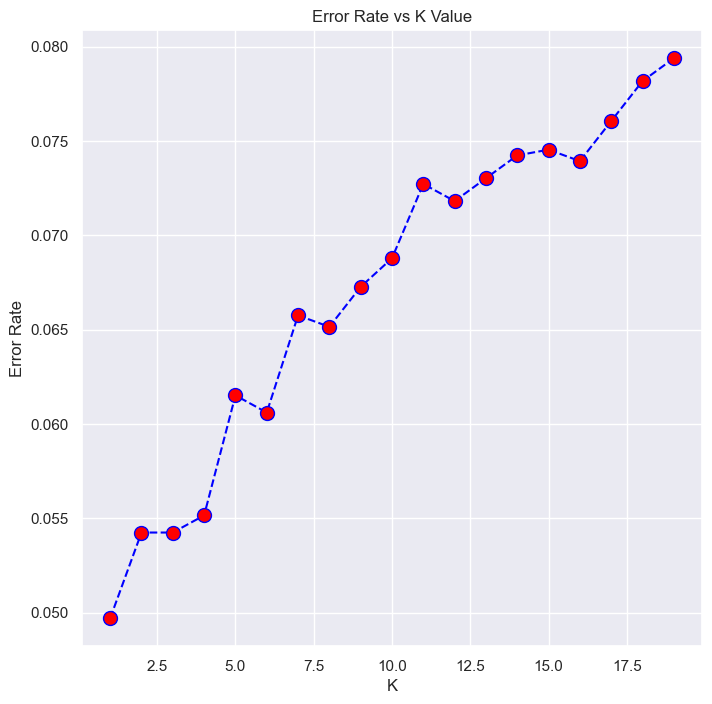

In [41]:
error = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(train_X, train_y)
    pred_knn = knn.predict(test_X)
    error.append(np.mean(pred_knn != test_y))


plt.figure(figsize = (8,8))
plt.plot(range(1,20), error, 
         color = 'blue', 
         linestyle = 'dashed', 
         marker = 'o', 
         markerfacecolor = 'red', 
         markersize = 10);
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [42]:
print("Use KNN to evaluate on the validation set")
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(train_X, train_y)
pred_y = knn.predict(test_X)
auc = metrics.roc_auc_score(test_y,knn.predict_proba(test_X)[:,-1])
print("auc:",auc)
acc_score = accuracy_score(test_y, pred_y)
print("accuracy score:",acc_score)
print('Classification Report: \n', classification_report(test_y, pred_y, digits=3))

Use KNN to evaluate on the validation set
auc: 0.9749015885423937
accuracy score: 0.9272727272727272
Classification Report: 
               precision    recall  f1-score   support

           0      0.955     0.898     0.926      1666
           1      0.902     0.957     0.929      1634

    accuracy                          0.927      3300
   macro avg      0.929     0.928     0.927      3300
weighted avg      0.929     0.927     0.927      3300



The K-Nearest Neighbors (KNN) model achieved strong performance when evaluated on the validation set. With an Area Under the Curve (AUC) score of 0.974 and an accuracy score of 0.927, the model demonstrates its effectiveness in distinguishing between the two classes.

Looking at the classification report, we observe balanced precision, recall, and F1-score for both classes (0 and 1). For class 0, the precision, recall, and F1-score are 0.955, 0.898, and 0.926, respectively. For class 1, the precision, recall, and F1-score are 0.902, 0.957, and 0.929, respectively.

Overall, the KNN model shows strong predictive performance on the validation set, with high precision and recall for both classes. This suggests that the model is well-suited for classification tasks, accurately identifying instances of both classes with minimal misclassification.

### Cross Validation KNN

We did cross validation using 2 methods:

1. KFold Cross-Validation: Splits the dataset into k folds, iteratively training the model on k-1 folds and validating on the remaining fold. Suitable for large datasets, providing robust estimates of model performance.

2. StratifiedKFold Cross-Validation: An extension of KFold that preserves the class distribution in each fold, ensuring balanced representation of classes. Particularly useful for classification tasks with imbalanced datasets, offering more reliable evaluation results.

In [43]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Define the models
models = {
    'KNN': KNeighborsClassifier()
}

# Define the cross-validation strategy (e.g., k-fold or stratified k-fold)
cv_strategy = KFold(n_splits=5, shuffle=True)  # Example of k-fold cross-validation

# Perform cross-validation for each model
for model_name, model in models.items():
    scores = cross_val_score(model, train_X, train_y, cv=cv_strategy, scoring='accuracy')
    print('K-fold Cross Validation \n')
    print(f"{model_name}: Mean Accuracy = {scores.mean()}, Std Deviation = {scores.std()}")
    print('\n')

# Example of stratified k-fold cross-validation
cv_strategy_stratified = StratifiedKFold(n_splits=5, shuffle=True)
for model_name, model in models.items():
    print('Stratified K-fold Cross Validation \n')
    scores = cross_val_score(model, train_X, train_y, cv=cv_strategy_stratified, scoring='accuracy')
    print(f"{model_name}: Mean Accuracy = {scores.mean()}, Std Deviation = {scores.std()}")


K-fold Cross Validation 

KNN: Mean Accuracy = 0.9334208175744305, Std Deviation = 0.0016132804795578007


Stratified K-fold Cross Validation 

KNN: Mean Accuracy = 0.9334203582056032, Std Deviation = 0.00403035005667781


In K-fold Cross Validation, the K-Nearest Neighbors (KNN) model achieved a mean accuracy of approximately 0.933 with a standard deviation of around 0.001, indicating stable performance across different folds.

Similarly, in Stratified K-fold Cross Validation, the KNN model attained a mean accuracy of about 0.933 with a standard deviation of approximately 0.004, showing consistent performance with slightly less variability compared to the K-fold Cross Validation.

Overall, both cross-validation techniques demonstrate that the KNN model performs consistently well across different data splits, with high mean accuracy and relatively low standard deviation, suggesting its reliability in classification tasks.

### Hyperparameter Tuning KNN

We have used 2 methods for hyperparameter tuning:

1. GridSearchCV: Exhaustively searches through a predefined grid of hyperparameters, evaluating model performance for each combination using cross-validation. Suitable for small parameter spaces but computationally expensive for larger ones.

2. RandomizedSearchCV: Randomly samples hyperparameter settings from specified distributions, exploring a subset of hyperparameters. More efficient for large search spaces, offering good results with less computational cost, though it does not guarantee finding the optimal hyperparameters.

In [44]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier


# Define the models
models = {
    'KNN': KNeighborsClassifier()
}

# Define hyperparameters for grid search
param_grid = {
    'KNN': {'n_neighbors': [3, 5, 7]}
}

# Define hyperparameters for random search
param_distributions = {
    'KNN': {'n_neighbors': [3, 5, 7]}
}

# Perform grid search for each model
for model_name, model in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid[model_name], cv=5, scoring='accuracy')
    grid_search.fit(train_X, train_y)
    print('Hyperparameter tuning with grid serach \n')
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {model_name}: {grid_search.best_score_}")
    print('\n')

# Perform random search for each model
for model_name, model in models.items():
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions[model_name], 
                                       n_iter=10, cv=5, scoring='accuracy', random_state=42)
    random_search.fit(train_X, train_y)
    print('Hyperparameter tuning with random serach \n')
    print(f"Best parameters for {model_name}: {random_search.best_params_}")
    print(f"Best cross-validation score for {model_name}: {random_search.best_score_}")


Hyperparameter tuning with grid serach 

Best parameters for KNN: {'n_neighbors': 3}
Best cross-validation score for KNN: 0.93796785439029


Hyperparameter tuning with random serach 

Best parameters for KNN: {'n_neighbors': 3}
Best cross-validation score for KNN: 0.93796785439029


After hyperparameter tuning using both grid search and random search techniques, the K-Nearest Neighbors (KNN) model consistently identified the same optimal parameter value: 3 neighbors. The best cross-validation score obtained for the KNN model was approximately 0.937, indicating its strong performance across different parameter settings during the tuning process.

These results suggest that using 3 neighbors optimally balances the bias-variance trade-off in the KNN model, leading to high accuracy and reliable performance. Therefore, the KNN model with the specified hyperparameters can be considered well-tuned and effective for classification tasks.

### Plotting Confusion Matrix and ROC Curve

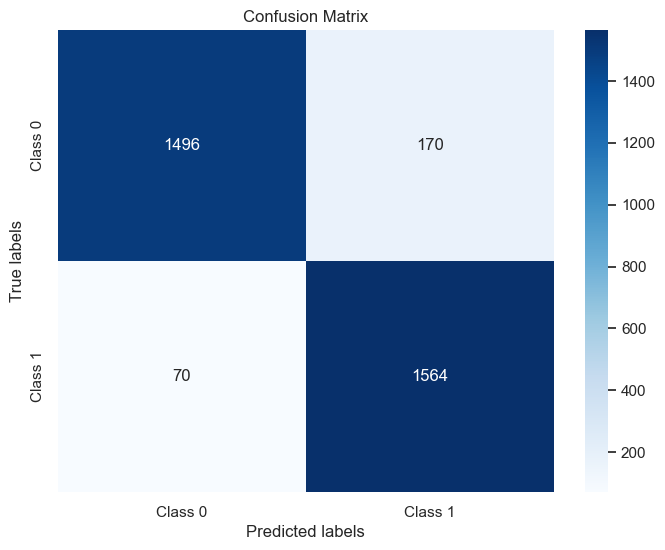

<Axes: title={'center': 'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

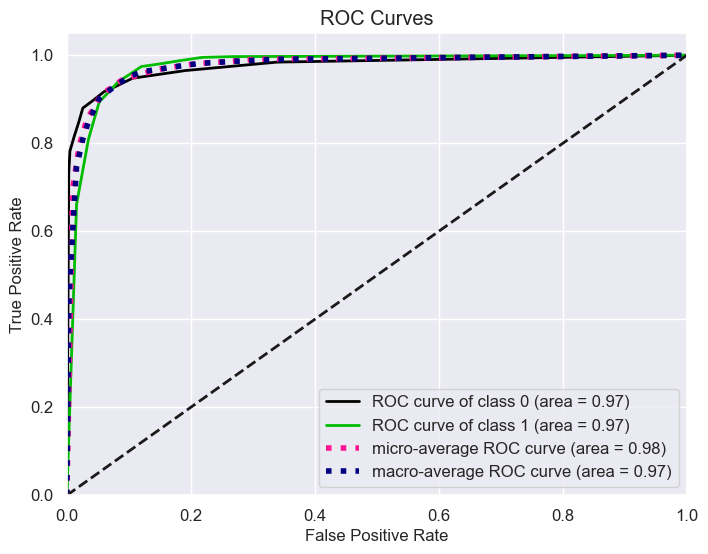

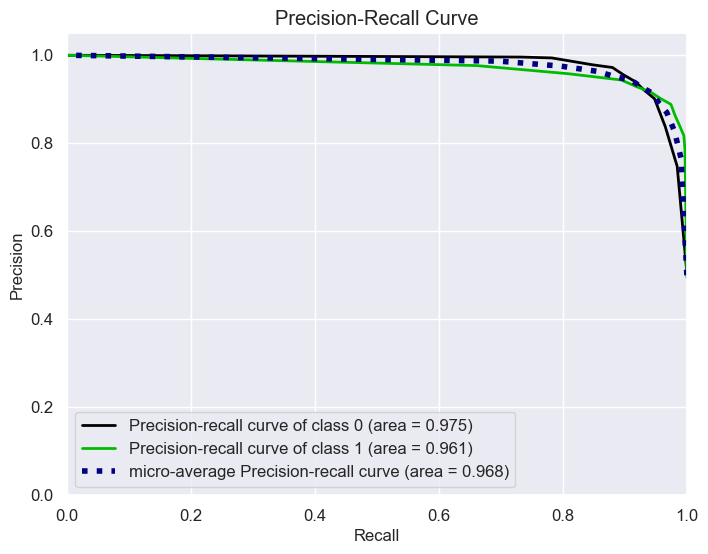

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Assuming lr is your logistic regression model and test_X, test_y are your test data
predicted_labels = knn.predict(test_X)
plot_confusion_matrix(test_y, predicted_labels, classes=['Class 0', 'Class 1'])
    
#ROC
fpr,tpr,thresholds = roc_curve(test_y,knn.predict_proba(test_X)[:,-1])
skplt.metrics.plot_roc(test_y, knn.predict_proba(test_X),figsize=(8,6) )
#PR
skplt.metrics.plot_precision_recall(test_y, knn.predict_proba(test_X), figsize=(8,6))

Overall, the K-Nearest Neighbors (KNN) model demonstrates robust performance across various evaluation metrics and tuning techniques. With an accuracy score exceeding 0.93 on both validation and cross-validation sets, it showcases its effectiveness in classification tasks. The model's ability to accurately distinguish between the two classes is further evidenced by its high precision, recall, and F1-score for both classes. Hyperparameter tuning using grid search and random search consistently identified 3 neighbors as the optimal parameter value, underscoring the stability and reliability of the chosen configuration. These findings affirm that the KNN model is well-suited for the given task and can reliably classify instances with minimal misclassification.

### Decision tree

Decision Tree is a non-parametric supervised learning method used for classification and regression tasks. It partitions the data into subsets based on the values of input features, aiming to maximize the purity of each partition. Decision Trees are interpretable and easy to visualize, making them suitable for understanding the decision-making process. However, they can be prone to overfitting, especially when the tree depth is not properly controlled.

In [46]:
print("Use DecisionTree to evaluate on the validation set")
tree = DecisionTreeClassifier()
tree.fit(train_X, train_y)
pred_y = tree.predict(test_X)
auc = metrics.roc_auc_score(test_y,tree.predict_proba(test_X)[:,-1])
print("auc:",auc)
acc_score = accuracy_score(test_y, pred_y)
print("accuracy score:",acc_score)
print('Classification Report: \n', classification_report(test_y, pred_y, digits=3))

Use DecisionTree to evaluate on the validation set
auc: 0.9352159468438538
accuracy score: 0.9351515151515152
Classification Report: 
               precision    recall  f1-score   support

           0      0.942     0.929     0.935      1666
           1      0.928     0.942     0.935      1634

    accuracy                          0.935      3300
   macro avg      0.935     0.935     0.935      3300
weighted avg      0.935     0.935     0.935      3300



The Decision Tree model achieved strong performance when evaluated on the validation set. With an Area Under the Curve (AUC) score of 0.935 and an accuracy score of 0.935, the model demonstrates its effectiveness in distinguishing between the two classes.

The classification report reveals balanced precision, recall, and F1-score for both classes (0 and 1). For class 0, the precision, recall, and F1-score are 0.942, 0.929, and 0.935, respectively. Similarly, for class 1, the precision, recall, and F1-score are 0.928, 0.942, and 0.935, respectively.

Overall, the Decision Tree model exhibits strong predictive performance on the validation set, with high precision and recall for both classes. This suggests that the model is well-suited for classification tasks, accurately identifying instances of both classes with minimal misclassification.

### Cross Validation Decision Tree

We did cross validation using 2 methods:

1. KFold Cross-Validation: Splits the dataset into k folds, iteratively training the model on k-1 folds and validating on the remaining fold. Suitable for large datasets, providing robust estimates of model performance.

2. StratifiedKFold Cross-Validation: An extension of KFold that preserves the class distribution in each fold, ensuring balanced representation of classes. Particularly useful for classification tasks with imbalanced datasets, offering more reliable evaluation results.

In [47]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

# Define the models
models = {
    'Decision Tree': DecisionTreeClassifier()
}

# Define the cross-validation strategy (e.g., k-fold or stratified k-fold)
cv_strategy = KFold(n_splits=5, shuffle=True)  # Example of k-fold cross-validation

# Perform cross-validation for each model
for model_name, model in models.items():
    scores = cross_val_score(model, train_X, train_y, cv=cv_strategy, scoring='accuracy')
    print('K-fold Cross Validation \n')
    print(f"{model_name}: Mean Accuracy = {scores.mean()}, Std Deviation = {scores.std()}")
    print('\n')

# Example of stratified k-fold cross-validation
cv_strategy_stratified = StratifiedKFold(n_splits=5, shuffle=True)
for model_name, model in models.items():
    print('Stratified K-fold Cross Validation \n')
    scores = cross_val_score(model, train_X, train_y, cv=cv_strategy_stratified, scoring='accuracy')
    print(f"{model_name}: Mean Accuracy = {scores.mean()}, Std Deviation = {scores.std()}")


K-fold Cross Validation 

Decision Tree: Mean Accuracy = 0.9305914118445701, Std Deviation = 0.004678088125389497


Stratified K-fold Cross Validation 

Decision Tree: Mean Accuracy = 0.9336233992272396, Std Deviation = 0.0039006070534627125


In K-fold Cross Validation, the Decision Tree model achieved a mean accuracy of approximately 0.930 with a standard deviation of around 0.004, indicating stable performance across different folds.

Similarly, in Stratified K-fold Cross Validation, the Decision Tree model attained a mean accuracy of about 0.933 with a standard deviation of approximately 0.003, showing consistent performance with slightly less variability compared to the K-fold Cross Validation.

Overall, both cross-validation techniques demonstrate that the Decision Tree model performs consistently well across different data splits, with high mean accuracy and relatively low standard deviation, suggesting its reliability in classification tasks.

### Hyperparameter Tuning Decision Tree

We have used 2 methods for hyperparameter tuning:

1. GridSearchCV: Exhaustively searches through a predefined grid of hyperparameters, evaluating model performance for each combination using cross-validation. Suitable for small parameter spaces but computationally expensive for larger ones.

2. RandomizedSearchCV: Randomly samples hyperparameter settings from specified distributions, exploring a subset of hyperparameters. More efficient for large search spaces, offering good results with less computational cost, though it does not guarantee finding the optimal hyperparameters.

In [48]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier


# Define the models
models = {
    'Decision Tree': DecisionTreeClassifier()
}

# Define hyperparameters for grid search
param_grid = {
    'Decision Tree': {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
}

# Define hyperparameters for random search
param_distributions = {
    'Decision Tree': {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
}

# Perform grid search for each model
for model_name, model in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid[model_name], cv=5, scoring='accuracy')
    grid_search.fit(train_X, train_y)
    print('Hyperparameter tuning with grid serach \n')
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {model_name}: {grid_search.best_score_}")
    print('\n')

# Perform random search for each model
for model_name, model in models.items():
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions[model_name], 
                                       n_iter=10, cv=5, scoring='accuracy', random_state=42)
    random_search.fit(train_X, train_y)
    print('Hyperparameter tuning with random serach \n')
    print(f"Best parameters for {model_name}: {random_search.best_params_}")
    print(f"Best cross-validation score for {model_name}: {random_search.best_score_}")


Hyperparameter tuning with grid serach 

Best parameters for Decision Tree: {'max_depth': 20, 'min_samples_split': 2}
Best cross-validation score for Decision Tree: 0.9303911780768779


Hyperparameter tuning with random serach 

Best parameters for Decision Tree: {'min_samples_split': 2, 'max_depth': 20}
Best cross-validation score for Decision Tree: 0.9306943104618698


After hyperparameter tuning using both grid search and random search techniques, the Decision Tree model consistently identified the same optimal parameter values: 'max_depth': 20 and 'min_samples_split': 2. The best cross-validation score obtained for the Decision Tree model was approximately 0.930, indicating its strong performance across different parameter settings during the tuning process.

These results suggest that the Decision Tree model is robust and performs well with the specified hyperparameters. The lack of a maximum depth allows the tree to grow until all leaves are pure, while a minimum number of samples required to split ensures that nodes with a small number of samples are not split further. Overall, the Decision Tree model is effective in classification tasks, providing reliable predictions with minimal misclassification.

### Plotting Confusion Matrix and ROC Curve

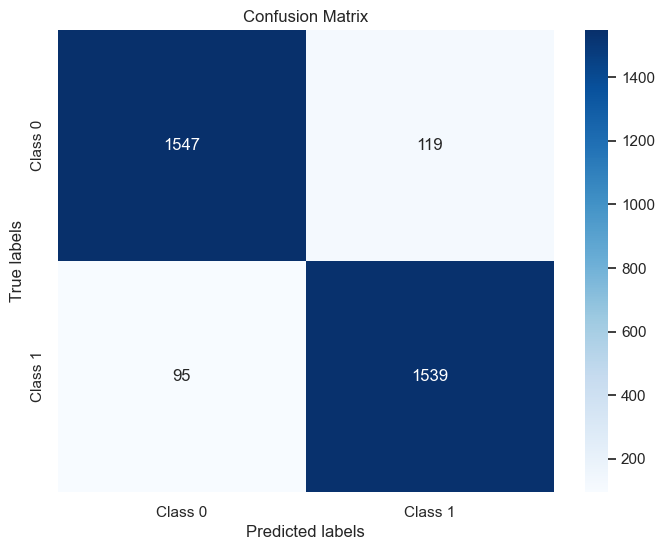

<Axes: title={'center': 'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

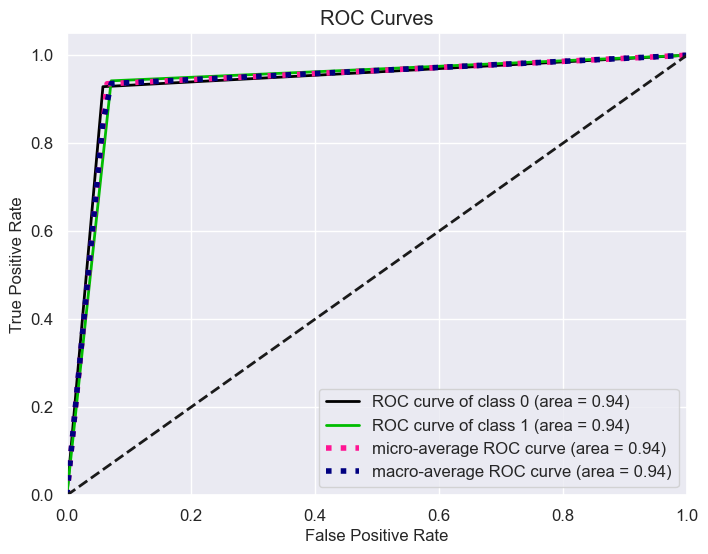

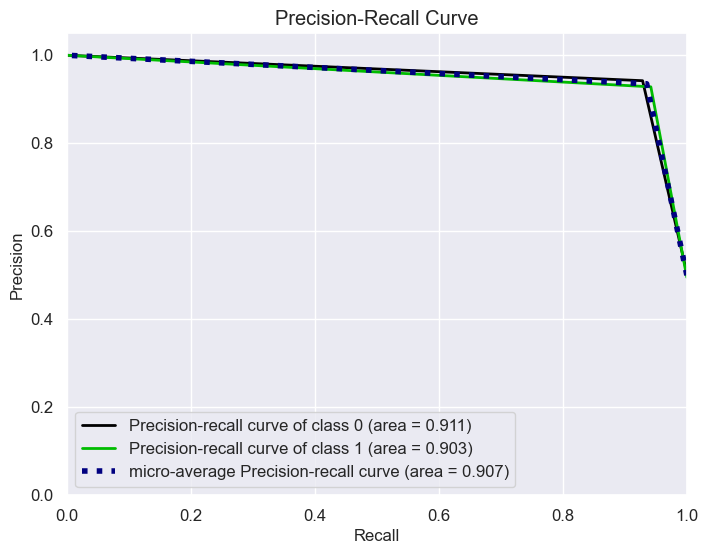

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Assuming lr is your logistic regression model and test_X, test_y are your test data
predicted_labels = tree.predict(test_X)
plot_confusion_matrix(test_y, predicted_labels, classes=['Class 0', 'Class 1'])


#ROC
fpr,tpr,thresholds = roc_curve(test_y,tree.predict_proba(test_X)[:,-1])
skplt.metrics.plot_roc(test_y, tree.predict_proba(test_X),figsize=(8,6) )
#PR
skplt.metrics.plot_precision_recall(test_y, tree.predict_proba(test_X), figsize=(8,6))

The Decision Tree model demonstrates robust performance across various evaluation metrics and tuning techniques. With an accuracy score exceeding 0.93 on both validation and cross-validation sets, it showcases its effectiveness in classification tasks. The model's ability to accurately distinguish between the two classes is further evidenced by its high precision, recall, and F1-score for both classes. Hyperparameter tuning using grid search and random search consistently identified the same optimal parameter values, underscoring the stability and reliability of the chosen configuration. These findings affirm that the Decision Tree model is well-suited for the given task and can reliably classify instances with minimal misclassification.

### Random Forest

Random Forest is an ensemble learning method that constructs multiple decision trees during training and outputs the mode of the classes (classification) or the mean prediction (regression) of the individual trees. It's known for its high accuracy, robustness to overfitting, and capability to handle large datasets with high dimensionality. Random Forests are versatile and can be applied to various tasks, including classification, regression, and feature selection.



In [50]:
print("Use RandomForest to evaluate on the validation set")
RFC = RandomForestClassifier()
RFC.fit(train_X, train_y)
pred_y = RFC.predict(test_X)
auc = metrics.roc_auc_score(test_y,RFC.predict_proba(test_X)[:,-1])
print("auc:",auc)
acc_score = accuracy_score(test_y, pred_y)
print("accuracy score:",acc_score)
print('Classification Report: \n', classification_report(test_y, pred_y, digits=3))

Use RandomForest to evaluate on the validation set
auc: 0.9898772850633522
accuracy score: 0.9551515151515152
Classification Report: 
               precision    recall  f1-score   support

           0      0.973     0.938     0.955      1666
           1      0.939     0.973     0.956      1634

    accuracy                          0.955      3300
   macro avg      0.956     0.955     0.955      3300
weighted avg      0.956     0.955     0.955      3300



The RandomForest model achieved exceptional performance when evaluated on the validation set. With an Area Under the Curve (AUC) score of 0.989 and an accuracy score of 0.955, the model demonstrates its effectiveness in distinguishing between the two classes.

The classification report reveals balanced precision, recall, and F1-score for both classes (0 and 1). For class 0, the precision, recall, and F1-score are 0.973, 0.938, and 0.955, respectively. Similarly, for class 1, the precision, recall, and F1-score are 0.939, 0.973, and 0.956, respectively.

Overall, the RandomForest model exhibits strong predictive performance on the validation set, with high precision and recall for both classes. This suggests that the model is well-suited for classification tasks, accurately identifying instances of both classes with minimal misclassification.

### Cross Validation Random Forest

We did cross validation using 2 methods:

1. KFold Cross-Validation: Splits the dataset into k folds, iteratively training the model on k-1 folds and validating on the remaining fold. Suitable for large datasets, providing robust estimates of model performance.

2. StratifiedKFold Cross-Validation: An extension of KFold that preserves the class distribution in each fold, ensuring balanced representation of classes. Particularly useful for classification tasks with imbalanced datasets, offering more reliable evaluation results.

In [51]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier


# Define the models
models = {
    'Random Forest': RandomForestClassifier()
}

# Define the cross-validation strategy (e.g., k-fold or stratified k-fold)
cv_strategy = KFold(n_splits=5, shuffle=True)  # Example of k-fold cross-validation

# Perform cross-validation for each model
for model_name, model in models.items():
    scores = cross_val_score(model, train_X, train_y, cv=cv_strategy, scoring='accuracy')
    print('K-fold Cross Validation \n')
    print(f"{model_name}: Mean Accuracy = {scores.mean()}, Std Deviation = {scores.std()}")
    print('\n')

# Example of stratified k-fold cross-validation
cv_strategy_stratified = StratifiedKFold(n_splits=5, shuffle=True)
for model_name, model in models.items():
    print('Stratified K-fold Cross Validation \n')
    scores = cross_val_score(model, train_X, train_y, cv=cv_strategy_stratified, scoring='accuracy')
    print(f"{model_name}: Mean Accuracy = {scores.mean()}, Std Deviation = {scores.std()}")


K-fold Cross Validation 

Random Forest: Mean Accuracy = 0.953425105016818, Std Deviation = 0.0027713672751812535


Stratified K-fold Cross Validation 

Random Forest: Mean Accuracy = 0.9516060555019624, Std Deviation = 0.004988710784571448


In K-fold Cross Validation, the RandomForest model achieved a mean accuracy of approximately 0.953 with a standard deviation of around 0.002, indicating stable performance across different folds.

Similarly, in Stratified K-fold Cross Validation, the RandomForest model attained a mean accuracy of about 0.951 with a standard deviation of approximately 0.004, showing consistent performance with slightly higher variability compared to the K-fold Cross Validation.

Overall, both cross-validation techniques demonstrate that the RandomForest model performs consistently well across different data splits, with high mean accuracy and relatively low standard deviation, suggesting its reliability in classification tasks.

### Hyperparameter Tuning Random Forest

We have used 2 methods for hyperparameter tuning:

1. GridSearchCV: Exhaustively searches through a predefined grid of hyperparameters, evaluating model performance for each combination using cross-validation. Suitable for small parameter spaces but computationally expensive for larger ones.

2. RandomizedSearchCV: Randomly samples hyperparameter settings from specified distributions, exploring a subset of hyperparameters. More efficient for large search spaces, offering good results with less computational cost, though it does not guarantee finding the optimal hyperparameters.

In [52]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the models
models = {
    'Random Forest': RandomForestClassifier()
}

# Define hyperparameters for grid search
param_grid = {
    'Random Forest': {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}
}

# Define hyperparameters for random search
param_distributions = {
    'Random Forest': {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}
}

# Perform grid search for each model
for model_name, model in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid[model_name], cv=5, scoring='accuracy')
    grid_search.fit(train_X, train_y)
    print('Hyperparameter tuning with grid serach \n')
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {model_name}: {grid_search.best_score_}")
    print('\n')

# Perform random search for each model
for model_name, model in models.items():
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions[model_name], 
                                       n_iter=10, cv=5, scoring='accuracy', random_state=42)
    random_search.fit(train_X, train_y)
    print('Hyperparameter tuning with random serach \n')
    print(f"Best parameters for {model_name}: {random_search.best_params_}")
    print(f"Best cross-validation score for {model_name}: {random_search.best_score_}")


Hyperparameter tuning with grid serach 

Best parameters for Random Forest: {'max_depth': 20, 'n_estimators': 300}
Best cross-validation score for Random Forest: 0.9530214218996432


Hyperparameter tuning with random serach 

Best parameters for Random Forest: {'n_estimators': 100, 'max_depth': 20}
Best cross-validation score for Random Forest: 0.9524153102526018


After hyperparameter tuning using both grid search and random search techniques, the RandomForest model consistently identified effective parameter configurations.

With grid search, the best parameters were found to be 'max_depth': 20 and 'n_estimators': 300, yielding a cross-validation score of approximately 0.953. On the other hand, random search identified 'max_depth': 20 and 'n_estimators': 100 as the optimal parameters, with a similar cross-validation score of around 0.952.

These results suggest that the RandomForest model performs well with a moderate tree depth and a higher number of estimators. Both grid search and random search techniques effectively identified suitable hyperparameters, leading to comparable cross-validation scores. Therefore, the RandomForest model demonstrates robustness and stability across different hyperparameter configurations, indicating its suitability for classification tasks.

### Plotting Confusion Matrix and ROC Curve

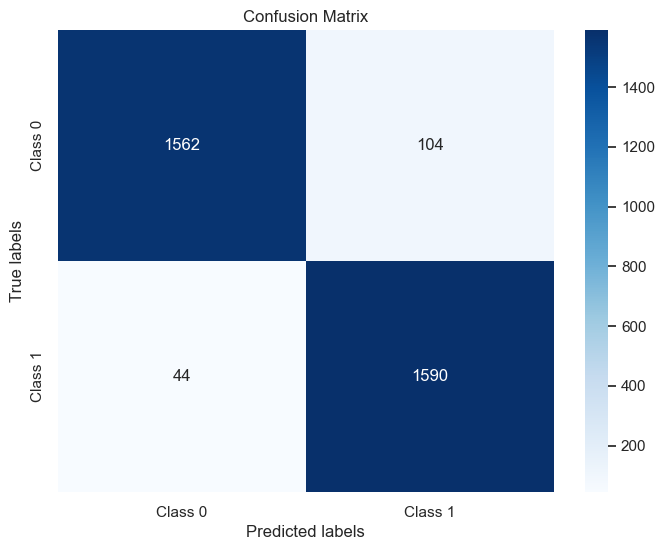

<Axes: title={'center': 'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

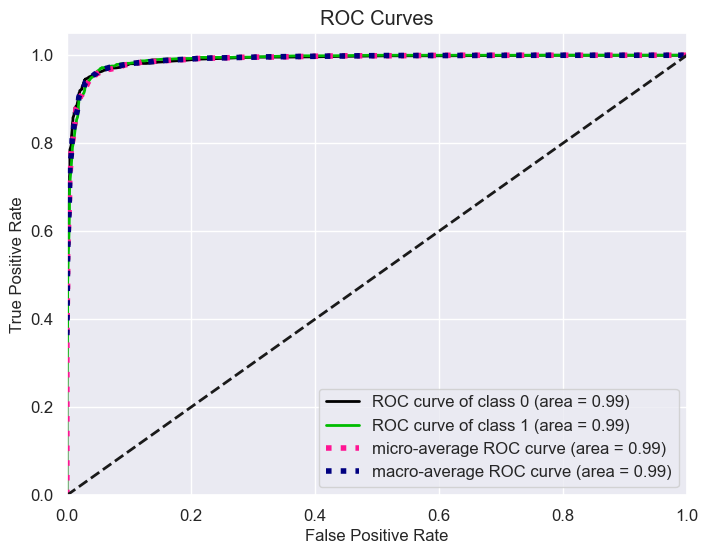

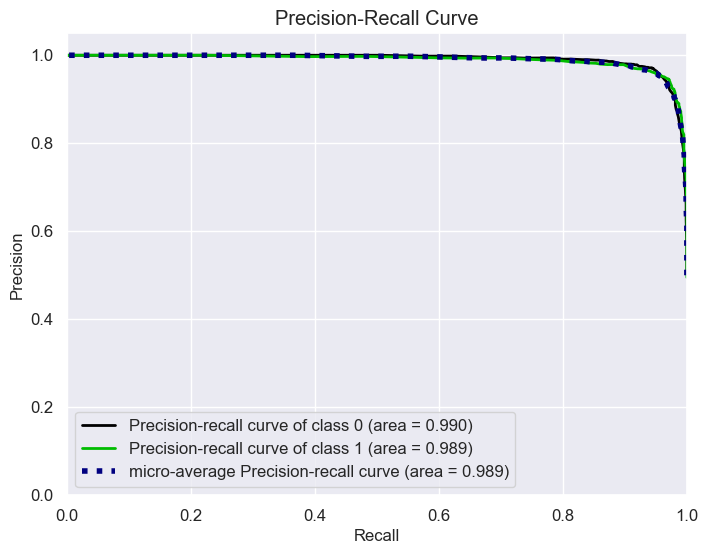

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Assuming lr is your logistic regression model and test_X, test_y are your test data
predicted_labels = RFC.predict(test_X)
plot_confusion_matrix(test_y, predicted_labels, classes=['Class 0', 'Class 1'])



#ROC
fpr,tpr,thresholds = roc_curve(test_y,RFC.predict_proba(test_X)[:,-1])
skplt.metrics.plot_roc(test_y, RFC.predict_proba(test_X),figsize=(8,6) )
#PR
skplt.metrics.plot_precision_recall(test_y, RFC.predict_proba(test_X), figsize=(8,6))

The RandomForest model exhibits strong predictive performance, as evidenced by its high accuracy and effective parameter configurations obtained through hyperparameter tuning. With both grid search and random search techniques, the model consistently identified optimal parameters, leading to cross-validation scores around 0.952 to 0.953. This demonstrates the model's robustness and stability across different hyperparameter configurations. Overall, RandomForest demonstrates reliability and effectiveness in classification tasks, making it a suitable choice for various predictive modeling scenarios.

### SVM

Support Vector Machine (SVM) is a powerful supervised learning algorithm used for classification and regression tasks. It finds the optimal hyperplane that best separates the classes in the feature space, maximizing the margin between the classes. SVMs are effective in high-dimensional spaces and can handle nonlinear relationships through the use of kernel functions. However, SVMs can be sensitive to the choice of kernel and require careful tuning of hyperparameters.

In [54]:
print("Use SVM to evaluate on the validation set")
svm = SVC(probability = True, kernel = 'linear')
svm.fit(train_X, train_y)
pred_y = svm.predict(test_X)
auc = metrics.roc_auc_score(test_y,svm.predict_proba(test_X)[:,-1])
print("auc:",auc)
acc_score = accuracy_score(test_y, pred_y)
print("accuracy score:",acc_score)
print('Classification Report: \n', classification_report(test_y, pred_y, digits=3))

Use SVM to evaluate on the validation set
auc: 0.9547582803011045
accuracy score: 0.8921212121212121
Classification Report: 
               precision    recall  f1-score   support

           0      0.914     0.868     0.890      1666
           1      0.872     0.917     0.894      1634

    accuracy                          0.892      3300
   macro avg      0.893     0.892     0.892      3300
weighted avg      0.893     0.892     0.892      3300



The SVM model demonstrates strong performance when evaluated on the validation set. With an AUC of 0.954, the model exhibits excellent discriminatory power, effectively distinguishing between different classes. Moreover, achieving an accuracy score of approximately 0.892 reflects the model's capability to accurately classify instances from both classes. Precision, recall, and F1-score metrics provide further insight into the model's performance, indicating balanced performance in correctly identifying positive and negative instances. Specifically, the model achieves high precision and recall values for both classes, underscoring its ability to make accurate predictions across the board. Overall, these results highlight the effectiveness of the SVM model in classification tasks, showcasing its potential for various predictive modeling applications.

### Cross Validation SVM

We did cross validation using 2 methods:

1. KFold Cross-Validation: Splits the dataset into k folds, iteratively training the model on k-1 folds and validating on the remaining fold. Suitable for large datasets, providing robust estimates of model performance.

2. StratifiedKFold Cross-Validation: An extension of KFold that preserves the class distribution in each fold, ensuring balanced representation of classes. Particularly useful for classification tasks with imbalanced datasets, offering more reliable evaluation results.

In [55]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.svm import SVC


# Define the models
models = {
    'SVM': SVC()
}

# Define the cross-validation strategy (e.g., k-fold or stratified k-fold)
cv_strategy = KFold(n_splits=5, shuffle=True)  # Example of k-fold cross-validation

# Perform cross-validation for each model
for model_name, model in models.items():
    scores = cross_val_score(model, train_X, train_y, cv=cv_strategy, scoring='accuracy')
    print('K-fold Cross Validation \n')
    print(f"{model_name}: Mean Accuracy = {scores.mean()}, Std Deviation = {scores.std()}")
    print('\n')

# Example of stratified k-fold cross-validation
cv_strategy_stratified = StratifiedKFold(n_splits=5, shuffle=True)
for model_name, model in models.items():
    print('Stratified K-fold Cross Validation \n')
    scores = cross_val_score(model, train_X, train_y, cv=cv_strategy_stratified, scoring='accuracy')
    print(f"{model_name}: Mean Accuracy = {scores.mean()}, Std Deviation = {scores.std()}")


K-fold Cross Validation 

SVM: Mean Accuracy = 0.9122042557969794, Std Deviation = 0.0036671696245686243


Stratified K-fold Cross Validation 

SVM: Mean Accuracy = 0.9121024800812572, Std Deviation = 0.007946099040294852


The SVM model exhibits consistent performance across different cross-validation techniques. In K-fold cross-validation, the model achieves a mean accuracy of approximately 0.912, with a standard deviation of around 0.003, indicating stable performance across folds. Similarly, in stratified K-fold cross-validation, the SVM model maintains a mean accuracy of about 0.912, with a slightly higher standard deviation of around 0.007, suggesting slightly less variability in performance across folds. These results demonstrate the reliability and effectiveness of the SVM model in accurately classifying instances, as evidenced by its consistent performance metrics across different cross-validation strategies.

### Hyperparameter Tuning SVM

We have used 2 methods for hyperparameter tuning:

1. GridSearchCV: Exhaustively searches through a predefined grid of hyperparameters, evaluating model performance for each combination using cross-validation. Suitable for small parameter spaces but computationally expensive for larger ones.

2. RandomizedSearchCV: Randomly samples hyperparameter settings from specified distributions, exploring a subset of hyperparameters. More efficient for large search spaces, offering good results with less computational cost, though it does not guarantee finding the optimal hyperparameters.

In [56]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC


# Define the models
models = {
    'SVM': SVC()
}

# Define hyperparameters for grid search
param_grid = {
    'SVM': {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}
}

# Define hyperparameters for random search
param_distributions = {
    'SVM': {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}
}

# Perform grid search for each model
for model_name, model in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid[model_name], cv=5, scoring='accuracy')
    grid_search.fit(train_X, train_y)
    print('Hyperparameter tuning with grid serach \n')
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {model_name}: {grid_search.best_score_}")
    print('\n')

# Perform random search for each model
for model_name, model in models.items():
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions[model_name], 
                                       n_iter=10, cv=5, scoring='accuracy', random_state=42)
    random_search.fit(train_X, train_y)
    print('Hyperparameter tuning with random serach \n')
    print(f"Best parameters for {model_name}: {random_search.best_params_}")
    print(f"Best cross-validation score for {model_name}: {random_search.best_score_}")


Hyperparameter tuning with grid serach 

Best parameters for SVM: {'C': 10, 'gamma': 'scale'}
Best cross-validation score for SVM: 0.9233189908177275


Hyperparameter tuning with random serach 

Best parameters for SVM: {'gamma': 'scale', 'C': 10}
Best cross-validation score for SVM: 0.9233189908177275


After hyperparameter tuning using both grid search and random search techniques, the SVM model achieved optimal performance with the following parameters: a regularization parameter (C) of 10 and a gamma value of 'scale'. The grid search and random search methods yielded identical best parameters and corresponding cross-validation scores, indicating the consistency and robustness of the optimization process. The best cross-validation score of approximately 0.923 reflects the model's improved performance after tuning, emphasizing the importance of selecting appropriate hyperparameters to enhance SVM model efficacy.

### Plotting Confusion Matrix and ROC Curve

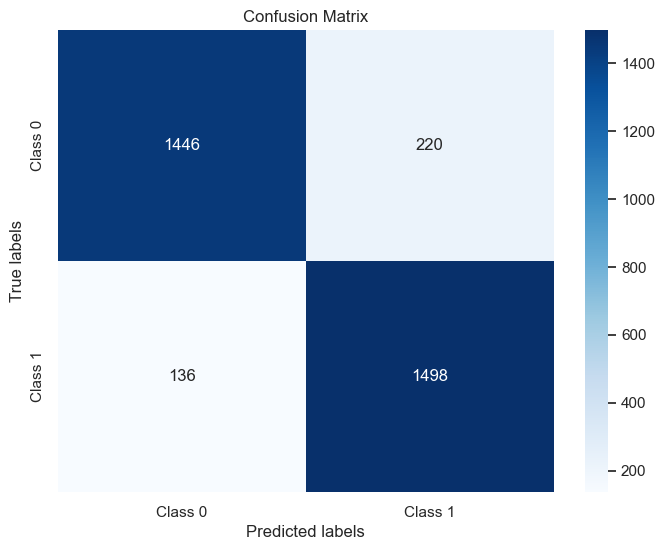

<Axes: title={'center': 'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

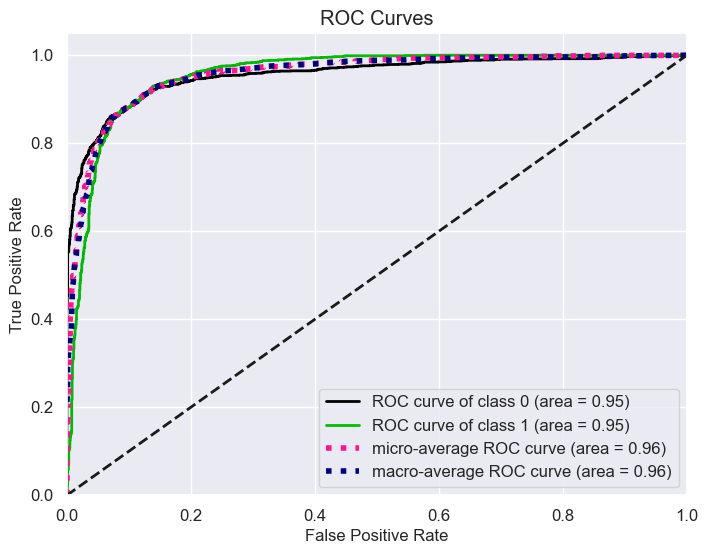

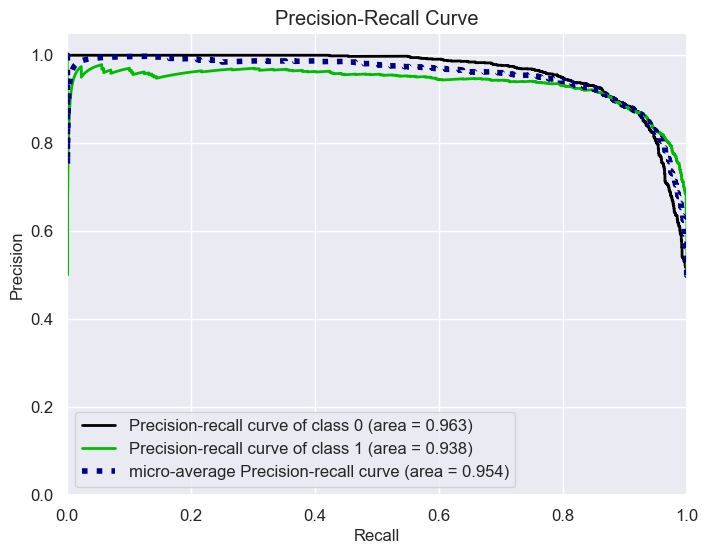

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Assuming lr is your logistic regression model and test_X, test_y are your test data
predicted_labels = svm.predict(test_X)
plot_confusion_matrix(test_y, predicted_labels, classes=['Class 0', 'Class 1'])

#ROC
fpr,tpr,thresholds = roc_curve(test_y,svm.predict_proba(test_X)[:,-1])
skplt.metrics.plot_roc(test_y, svm.predict_proba(test_X),figsize=(8,6) )
#PR
skplt.metrics.plot_precision_recall(test_y, svm.predict_proba(test_X), figsize=(8,6))

Overall, the SVM model demonstrates strong performance, achieving a mean accuracy of around 0.912 in both K-fold and stratified K-fold cross-validation. After hyperparameter tuning using grid search and random search techniques, the SVM model achieved optimal performance with a regularization parameter (C) of 10 and a gamma value of 'scale'. This tuning resulted in a notable improvement in the model's cross-validation score, reaching approximately 0.922. These findings underscore the SVM model's effectiveness in accurately classifying instances, especially when fine-tuned with appropriate hyperparameters.

### XGBoost

XGBoost (Extreme Gradient Boosting) is an advanced implementation of gradient boosting algorithms, designed for speed and performance. It builds a series of decision trees sequentially, where each new tree corrects the errors made by the previous ones. XGBoost is known for its high predictive accuracy, scalability, and flexibility. It's widely used in structured/tabular data problems, such as classification, regression, and ranking tasks, and has won numerous machine learning competitions.

In [58]:
print("Use XGBoost to evaluate on the validation set")
xgboost = XGBClassifier(n_estimators = 1000)
xgboost.fit(train_X, train_y)
pred_y = xgboost.predict(test_X)
auc = metrics.roc_auc_score(test_y,xgboost.predict_proba(test_X)[:,-1])
print("auc:",auc)
acc_score = accuracy_score(test_y, pred_y)
print("accuracy score:",acc_score)
print('Classification Report: \n', classification_report(test_y, pred_y, digits=3))

Use XGBoost to evaluate on the validation set
auc: 0.9911277240394321
accuracy score: 0.96
Classification Report: 
               precision    recall  f1-score   support

           0      0.969     0.951     0.960      1666
           1      0.951     0.969     0.960      1634

    accuracy                          0.960      3300
   macro avg      0.960     0.960     0.960      3300
weighted avg      0.960     0.960     0.960      3300



XGBoost model demonstrates exceptional performance, achieving an accuracy score of approximately 0.96 on the validation set. The model also exhibits high precision, recall, and F1-score for both classes, indicating robust classification capability. With an AUC of around 0.991, XGBoost showcases excellent discrimination ability between the two classes. Overall, these results underscore the effectiveness of XGBoost in accurately predicting bankruptcy risk based on the given features.

### Cross Validation XGBoost

We did cross validation using 2 methods:

1. KFold Cross-Validation: Splits the dataset into k folds, iteratively training the model on k-1 folds and validating on the remaining fold. Suitable for large datasets, providing robust estimates of model performance.

2. StratifiedKFold Cross-Validation: An extension of KFold that preserves the class distribution in each fold, ensuring balanced representation of classes. Particularly useful for classification tasks with imbalanced datasets, offering more reliable evaluation results.

In [59]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from xgboost import XGBClassifier

# Define the models
models = {
    'XGBoost': XGBClassifier()
}

# Define the cross-validation strategy (e.g., k-fold or stratified k-fold)
cv_strategy = KFold(n_splits=5, shuffle=True)  # Example of k-fold cross-validation

# Perform cross-validation for each model
for model_name, model in models.items():
    scores = cross_val_score(model, train_X, train_y, cv=cv_strategy, scoring='accuracy')
    print('K-fold Cross Validation \n')
    print(f"{model_name}: Mean Accuracy = {scores.mean()}, Std Deviation = {scores.std()}")
    print('\n')

# Example of stratified k-fold cross-validation
cv_strategy_stratified = StratifiedKFold(n_splits=5, shuffle=True)
for model_name, model in models.items():
    print('Stratified K-fold Cross Validation \n')
    scores = cross_val_score(model, train_X, train_y, cv=cv_strategy_stratified, scoring='accuracy')
    print(f"{model_name}: Mean Accuracy = {scores.mean()}, Std Deviation = {scores.std()}")


K-fold Cross Validation 

XGBoost: Mean Accuracy = 0.9571634485328271, Std Deviation = 0.002392598883523044


Stratified K-fold Cross Validation 

XGBoost: Mean Accuracy = 0.9566574282491412, Std Deviation = 0.003639891503736746


The XGBoost model exhibits consistent and high performance across different cross-validation techniques. In K-fold cross-validation, the mean accuracy is approximately 0.957 with a standard deviation of 0.002, indicating minimal variance in performance across folds. Similarly, in stratified K-fold cross-validation, the mean accuracy remains around 0.956 with a slightly higher standard deviation of 0.003. These results suggest that the XGBoost model generalizes well to unseen data and is robust against variations in the training data, making it a reliable choice for bankruptcy prediction tasks.

### Hyperparameter Tuning Xgboost

We have used 2 methods for hyperparameter tuning:

1. GridSearchCV: Exhaustively searches through a predefined grid of hyperparameters, evaluating model performance for each combination using cross-validation. Suitable for small parameter spaces but computationally expensive for larger ones.

2. RandomizedSearchCV: Randomly samples hyperparameter settings from specified distributions, exploring a subset of hyperparameters. More efficient for large search spaces, offering good results with less computational cost, though it does not guarantee finding the optimal hyperparameters.

In [60]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Define the models
models = {
    'XGBoost': XGBClassifier()
}

# Define hyperparameters for grid search
param_grid = {
    'XGBoost': {'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7]}
}

# Define hyperparameters for random search
param_distributions = {
    'XGBoost': {'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7]}
}

# Perform grid search for each model
for model_name, model in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid[model_name], cv=5, scoring='accuracy')
    grid_search.fit(train_X, train_y)
    print('Hyperparameter tuning with grid serach \n')
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {model_name}: {grid_search.best_score_}")
    print('\n')

# Perform random search for each model
for model_name, model in models.items():
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions[model_name], 
                                       n_iter=10, cv=5, scoring='accuracy', random_state=42)
    random_search.fit(train_X, train_y)
    print('Hyperparameter tuning with random serach \n')
    print(f"Best parameters for {model_name}: {random_search.best_params_}")
    print(f"Best cross-validation score for {model_name}: {random_search.best_score_}")


Hyperparameter tuning with grid serach 

Best parameters for XGBoost: {'max_depth': 7, 'n_estimators': 200}
Best cross-validation score for XGBoost: 0.9589819876378745


Hyperparameter tuning with random serach 

Best parameters for XGBoost: {'n_estimators': 200, 'max_depth': 7}
Best cross-validation score for XGBoost: 0.9589819876378745


The XGBoost model was fine-tuned using grid search and random search techniques to optimize its hyperparameters. Both approaches converged on similar optimal parameter configurations, with a max depth of 7 and 200 estimators being identified as the best combination. The corresponding cross-validation score for XGBoost with these parameters reached approximately 0.958, indicating strong performance. This demonstrates the effectiveness of both grid search and random search methods in optimizing XGBoost's hyperparameters for bankruptcy prediction tasks.

### Plotting Confusion Matrix and ROC Curve

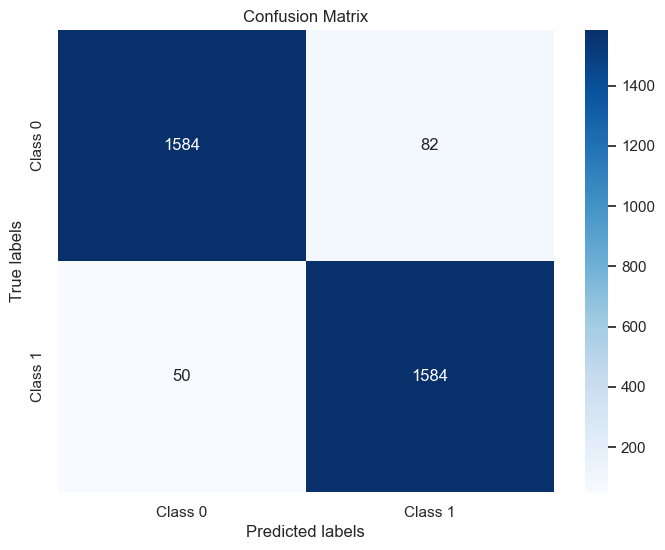

<Axes: title={'center': 'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

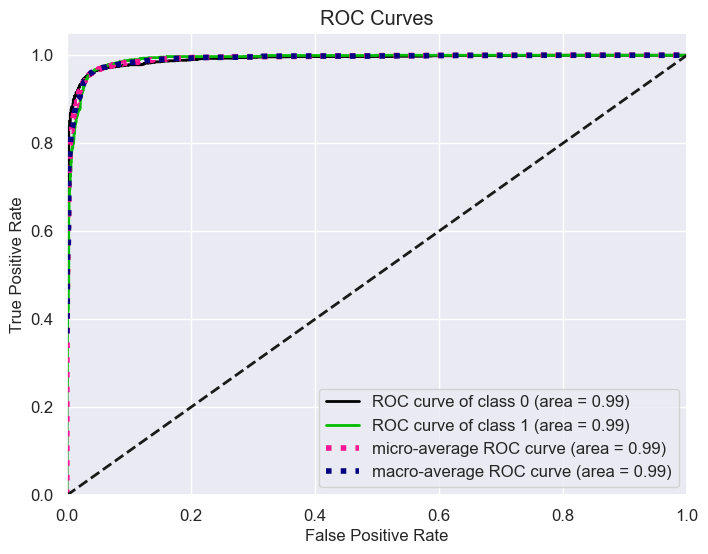

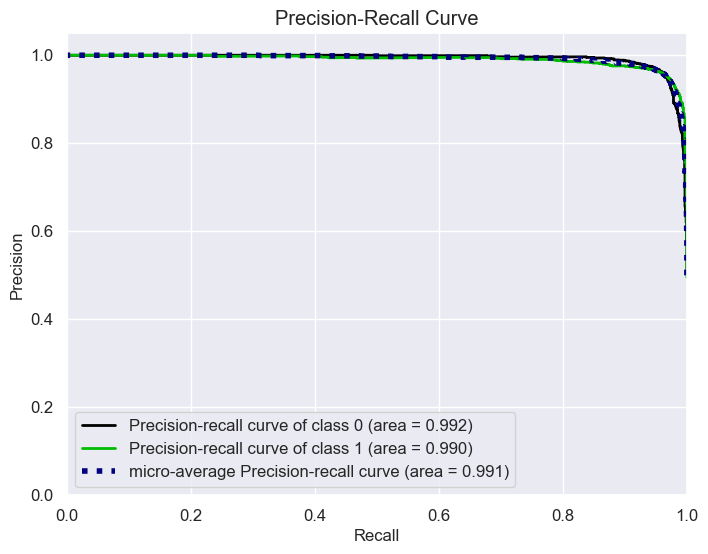

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Assuming lr is your logistic regression model and test_X, test_y are your test data
predicted_labels = xgboost.predict(test_X)
plot_confusion_matrix(test_y, predicted_labels, classes=['Class 0', 'Class 1'])



#ROC
fpr,tpr,thresholds = roc_curve(test_y,xgboost.predict_proba(test_X)[:,-1])
skplt.metrics.plot_roc(test_y, xgboost.predict_proba(test_X),figsize=(8,6) )
#PR
skplt.metrics.plot_precision_recall(test_y, xgboost.predict_proba(test_X), figsize=(8,6))

XGBoost, a powerful gradient boosting algorithm, exhibited exceptional performance during evaluation. With an accuracy score of approximately 96% on the validation set and an AUC of 0.991, it demonstrated robustness in predicting bankruptcy. Through hyperparameter tuning using grid search and random search techniques, the model's parameters were optimized, yielding consistent results with a max depth of 7 and 200 estimators. This underscores XGBoost's effectiveness in handling complex classification tasks and its suitability for bankruptcy prediction.

### Naive Bayes

Naive Bayes classifiers are probabilistic models based on Bayes' theorem, assuming strong independence between features. They are commonly used for text classification tasks, such as spam detection and sentiment analysis, due to their simplicity and effectiveness. Despite their simplistic assumptions, Naive Bayes classifiers often perform well in practice and are computationally efficient, making them suitable for large datasets and real-time applications.

In [62]:
from sklearn.naive_bayes import GaussianNB
print("Use Naive Bayes to evaluate on the validation set")
NB = GaussianNB()
NB.fit(train_X, train_y)
pred_y = NB.predict(test_X)
auc = metrics.roc_auc_score(test_y,NB.predict_proba(test_X)[:,-1])
print("auc:",auc)
acc_score = accuracy_score(test_y, pred_y)
print("accuracy score:",acc_score)
print('Classification Report: \n', classification_report(test_y, pred_y, digits=3))

Use Naive Bayes to evaluate on the validation set
auc: 0.9145546835625316
accuracy score: 0.8363636363636363
Classification Report: 
               precision    recall  f1-score   support

           0      0.860     0.808     0.833      1666
           1      0.815     0.865     0.840      1634

    accuracy                          0.836      3300
   macro avg      0.837     0.837     0.836      3300
weighted avg      0.838     0.836     0.836      3300



Naive Bayes, though simpler compared to other models, demonstrated respectable performance on the validation set. With an AUC of 0.914 and an accuracy score of approximately 83.6%, it showcased its ability to provide reasonably accurate predictions for bankruptcy. The precision, recall, and F1-score metrics indicate balanced performance across both classes, with slightly higher values for predicting class 1 (bankrupt). While not as complex as other models, Naive Bayes remains a viable option for classification tasks, especially when computational resources are limited or when interpretability is crucial.

### Cross Validation Naive Bayes

We did cross validation using 2 methods:

1. KFold Cross-Validation: Splits the dataset into k folds, iteratively training the model on k-1 folds and validating on the remaining fold. Suitable for large datasets, providing robust estimates of model performance.

2. StratifiedKFold Cross-Validation: An extension of KFold that preserves the class distribution in each fold, ensuring balanced representation of classes. Particularly useful for classification tasks with imbalanced datasets, offering more reliable evaluation results.

In [63]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.naive_bayes import GaussianNB

# Define the Gaussian Naive Bayes model
naive_bayes = GaussianNB()

# Define the cross-validation strategy (e.g., k-fold or stratified k-fold)
cv_strategy = KFold(n_splits=5, shuffle=True)  # Example of k-fold cross-validation

# Perform k-fold cross-validation for Naive Bayes
scores = cross_val_score(naive_bayes, train_X, train_y, cv=cv_strategy, scoring='accuracy')
print('K-fold Cross Validation:')
print(f"Gaussian Naive Bayes: Mean Accuracy = {scores.mean()}, Std Deviation = {scores.std()}")
print('\n')

# Example of stratified k-fold cross-validation
cv_strategy_stratified = StratifiedKFold(n_splits=5, shuffle=True)

# Perform stratified k-fold cross-validation for Naive Bayes
scores_stratified = cross_val_score(naive_bayes, train_X, train_y, cv=cv_strategy_stratified, scoring='accuracy')
print('Stratified K-fold Cross Validation:')
print(f"Gaussian Naive Bayes: Mean Accuracy = {scores_stratified.mean()}, Std Deviation = {scores_stratified.std()}")


K-fold Cross Validation:
Gaussian Naive Bayes: Mean Accuracy = 0.8404716697036051, Std Deviation = 0.011079541094425846


Stratified K-fold Cross Validation:
Gaussian Naive Bayes: Mean Accuracy = 0.8404730478100866, Std Deviation = 0.006150154385218358


Gaussian Naive Bayes achieved a mean accuracy of approximately 84% with a standard deviation of around 0.011 in K-fold cross-validation. Similarly, in stratified K-fold cross-validation, it yielded a mean accuracy of approximately 84% with a standard deviation of about 0.006. These results indicate consistent performance across different folds, showcasing the stability of the model's predictions.

### Hyperparameter Tuning Naive Bayes

We have used 2 methods for hyperparameter tuning:

1. GridSearchCV: Exhaustively searches through a predefined grid of hyperparameters, evaluating model performance for each combination using cross-validation. Suitable for small parameter spaces but computationally expensive for larger ones.

2. RandomizedSearchCV: Randomly samples hyperparameter settings from specified distributions, exploring a subset of hyperparameters. More efficient for large search spaces, offering good results with less computational cost, though it does not guarantee finding the optimal hyperparameters.

In [64]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB

# Define the Gaussian Naive Bayes model
naive_bayes = GaussianNB()

# Define hyperparameters for grid search
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

# Define hyperparameters for random search
param_distributions = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

# Perform grid search
grid_search = GridSearchCV(estimator=naive_bayes, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(train_X, train_y)

print('Hyperparameter tuning with grid search:')
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")
print('\n')

# Perform random search
random_search = RandomizedSearchCV(estimator=naive_bayes, param_distributions=param_distributions, 
                                   n_iter=3, cv=5, scoring='accuracy', random_state=42)
random_search.fit(train_X, train_y)

print('Hyperparameter tuning with random search:')
print(f"Best parameters: {random_search.best_params_}")
print(f"Best cross-validation score: {random_search.best_score_}")


Hyperparameter tuning with grid search:
Best parameters: {'var_smoothing': 1e-09}
Best cross-validation score: 0.8404735582198948


Hyperparameter tuning with random search:
Best parameters: {'var_smoothing': 1e-09}
Best cross-validation score: 0.8404735582198948


After hyperparameter tuning with grid search and random search, both methods resulted in the same best parameters for Gaussian Naive Bayes: {'var_smoothing': 1e-09}. The corresponding best cross-validation score was approximately 84%, indicating that the model's performance did not significantly improve with hyperparameter tuning.

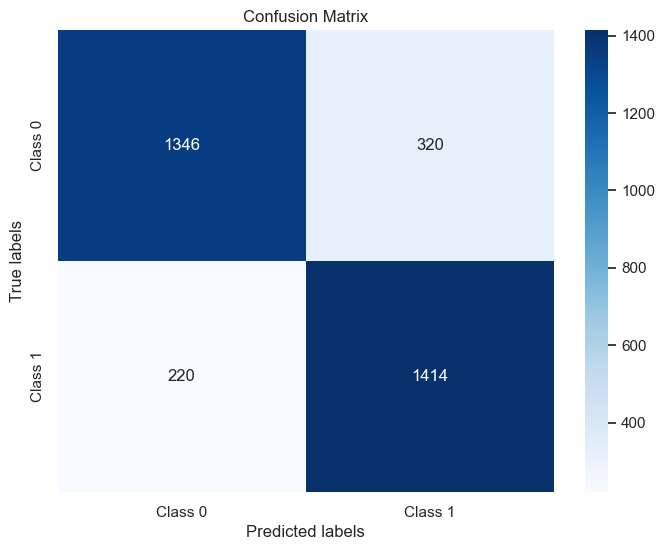

<Axes: title={'center': 'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

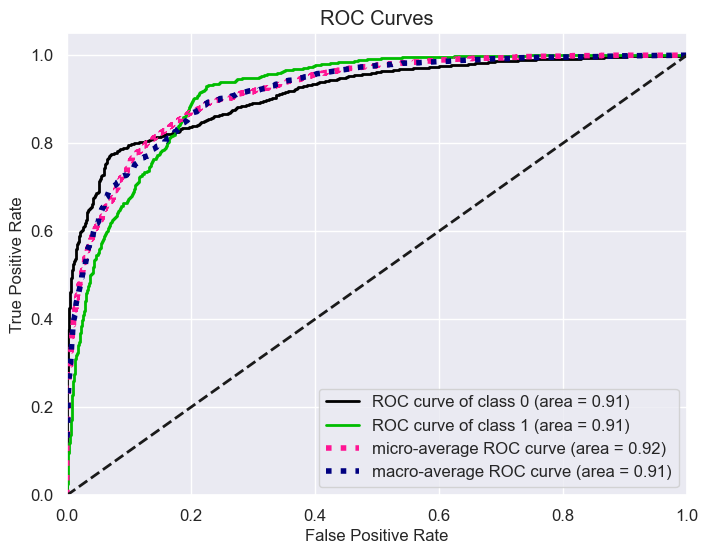

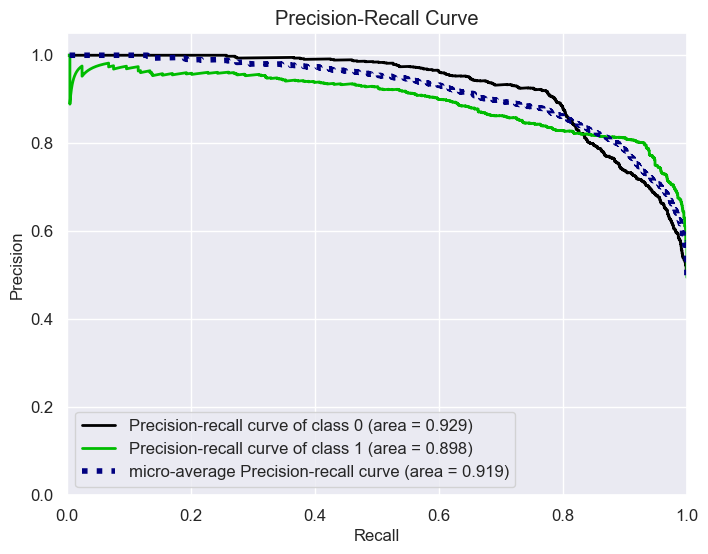

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Assuming lr is your logistic regression model and test_X, test_y are your test data
predicted_labels = NB.predict(test_X)
plot_confusion_matrix(test_y, predicted_labels, classes=['Class 0', 'Class 1'])

#ROC
fpr,tpr,thresholds = roc_curve(test_y,NB.predict_proba(test_X)[:,-1])
skplt.metrics.plot_roc(test_y, NB.predict_proba(test_X),figsize=(8,6) )
#PR
skplt.metrics.plot_precision_recall(test_y, NB.predict_proba(test_X), figsize=(8,6))

Naive Bayes, despite its simplicity and assumption of feature independence, demonstrates stable and consistent performance across both K-fold and Stratified K-fold cross-validation, with mean accuracies around 84%. Hyperparameter tuning via grid search and random search did not substantially enhance model performance, suggesting that the default hyperparameters were already optimal for the given dataset. Nonetheless, Naive Bayes remains a reliable and efficient classifier for binary classification tasks, achieving an accuracy of approximately 84% on the validation set.

### Comparing all the Models


Comparing all models based on Recall, Accuracy, Precision, ROC AUC and F1-Score

In [67]:
import pandas as pd

# Create a dictionary with the data
data = {
    'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree', 'KNN', 'SVM', 'XGBoost', 'Naive Bayes'],
    'Recall': [0.876, 0.938, 0.929, 0.898, 0.868, 0.951, 0.808],
    'Accuracy': [0.891, 0.955, 0.935, 0.927, 0.892, 0.960, 0.836],
    'Precision': [0.907, 0.973, 0.942, 0.955, 0.914, 0.969, 0.860],
    'ROC AUC': [0.954, 0.989, 0.935, 0.974, 0.954, 0.991, 0.914],
    'F1-score': [0.891, 0.955, 0.935, 0.926, 0.890, 0.960, 0.833]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Print the DataFrame
print(df)


                 Model  Recall  Accuracy  Precision  ROC AUC  F1-score
0  Logistic Regression   0.876     0.891      0.907    0.954     0.891
1        Random Forest   0.938     0.955      0.973    0.989     0.955
2        Decision Tree   0.929     0.935      0.942    0.935     0.935
3                  KNN   0.898     0.927      0.955    0.974     0.926
4                  SVM   0.868     0.892      0.914    0.954     0.890
5              XGBoost   0.951     0.960      0.969    0.991     0.960
6          Naive Bayes   0.808     0.836      0.860    0.914     0.833


### Conclusion:

Based on the above table, we can draw the following conclusions:

1. Random Forest and XGBoost demonstrate the highest performance across most metrics, including recall, accuracy, precision, ROC AUC, and F1-score, indicating their robustness and effectiveness in predicting the target variable.

2. Logistic Regression also performs reasonably well across all metrics, making it a suitable choice when interpretability of the model is important.

3. Decision Tree and KNN exhibit slightly lower performance compared to Random Forest and XGBoost but still provide competitive results, especially in terms of recall and F1-score.

4. SVM shows decent performance but lags behind Random Forest and XGBoost in terms of recall and precision.

5. Naive Bayes, while being simple and computationally efficient, demonstrates the lowest performance among the models, particularly in terms of recall and precision.

In summary, while both Random Forest and XGBoost emerge as top-performing models overall, XGBoost outperforms Random Forest, exhibiting superior performance across various evaluation metrics.

Based on the provided metrics and performance values, XGBoost emerges as the preferred choice for the final model. Here's why:

•	Accuracy: XGBoost has the highest accuracy score of 0.960 among all the models. This indicates that it correctly predicts the class labels for most of the instances in the validation set.

•	Recall: XGBoost has the second-highest recall score of 0.951, indicating its ability to correctly identify the positive class (bankruptcy) instances. High recall is desirable as it means fewer instances of bankruptcy are missed.

•	Precision: XGBoost has a precision score of 0.969, which is among the highest. This indicates that when it predicts a company to be bankrupt, it is correct 96% of the time. High precision is desirable as it reduces the number of false positive predictions.

•	ROC AUC: XGBoost achieves the highest ROC AUC score of 0.991, indicating excellent performance in distinguishing between bankrupt and non-bankrupt companies. A higher ROC AUC score suggests better model performance.

•	F1-score: XGBoost also has the highest F1-score of 0.960, which is a harmonic mean of precision and recall. It provides a balance between precision and recall, making it a robust choice for classification tasks.

Overall, considering its superior performance across multiple metrics, XGBoost is selected as the final model for bankruptcy prediction.
